# EDA
This is the Exploratory data analysis section

# Missing data analysis

In [4]:
import pandas as pd
import numpy as np

from src_eda import MissingDataAnalyzer
from src_eda import CategoricalEDA
from src_eda import DateTimeProcessor
from src_eda import OpenAIEmbedding, EmbeddingProcessor
from src_eda import DataProcessor, ClusteringAnalysis, TSNEVisualizer

import sqlite3

%load_ext autoreload
%autoreload 2


In [5]:
# Create a SQLite in-memory database
conn = sqlite3.connect(':memory:')


In [16]:
df = pd.read_excel("../data/raw_data/Question-Answer_dataset.xlsx")

# getting the duration
datetime_processor = DateTimeProcessor(df, 'Date_Time_Open', 'Date_Time_Closed')

# Process the dataframe to add Duration, Day_of_Week, Week_Number, and Month
df = datetime_processor.process_all()

df = df.rename(columns = {"Answer/Solution":"Answer_Solution"})


# Display the updated dataframe
df.head()




,Country,Requester_Type,Product,Indication,Question,Channel,Date_Time_Open,Date_Time_Closed,Answer_Solution,Duration,Day_of_Week,Week_Number,Month,Year
0,UK,HCP,Keytruda,NSCLC,What are the common side effects of Keytruda?,email,2023-06-27 17:00:00,2023-07-21 18:00:00,"Common side effects include fatigue, nausea, a...",34620.0,Tuesday,26,June,2023
1,US,Researcher,Keytruda,NSCLC,Can Keytruda cause immune-related adverse effe...,email,2023-06-08 08:00:00,2023-07-06 12:30:00,"Yes, Keytruda can cause immune-related adverse...",40590.0,Thursday,23,June,2023
2,UK,HCP,Keytruda,NSCLC,Is Keytruda safe for pregnant women?,call,2023-03-06 04:00:00,2023-04-19 15:00:00,Keytruda is not recommended for use during pre...,64020.0,Monday,10,March,2023
3,UK,Researcher,Keytruda,NSCLC,What should patients report immediately while ...,email,2023-02-05 10:30:00,2023-03-05 06:00:00,Patients should report any new or worsening sy...,40050.0,Sunday,5,February,2023
4,US,Researcher,Keytruda,NSCLC,Are there any known interactions between Keytr...,call,2023-03-14 09:30:00,2023-04-16 18:30:00,"Yes, Keytruda can interact with steroids and c...",48060.0,Tuesday,11,March,2023


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Country           50 non-null     object        
 1   Requester_Type    50 non-null     object        
 2   Product           50 non-null     object        
 3   Indication        50 non-null     object        
 4   Question          48 non-null     object        
 5   Channel           50 non-null     object        
 6   Date_Time_Open    50 non-null     datetime64[ns]
 7   Date_Time_Closed  50 non-null     datetime64[ns]
 8   Answer_Solution   46 non-null     object        
 9   Duration          50 non-null     float64       
 10  Day_of_Week       50 non-null     object        
 11  Week_Number       50 non-null     UInt32        
 12  Month             50 non-null     object        
 13  Year              50 non-null     int32         
dtypes: UInt32(1), datetime64[ns]

In [18]:
df.columns

Index(['Country', 'Requester_Type', 'Product', 'Indication', 'Question',
       'Channel', 'Date_Time_Open', 'Date_Time_Closed', 'Answer_Solution',
       'Duration', 'Day_of_Week', 'Week_Number', 'Month', 'Year'],
      dtype='object')

In [19]:
row = df.iloc[0]
row["Question"] + " " + row["Answer_Solution"]

'What are the common side effects of Keytruda? Common side effects include fatigue, nausea, and skin rash.'

# Dataclustering

Missing Data Summary:
                  Missing Count  Missing Percentage
Question                     2                 4.0
Answer_Solution              4                 8.0


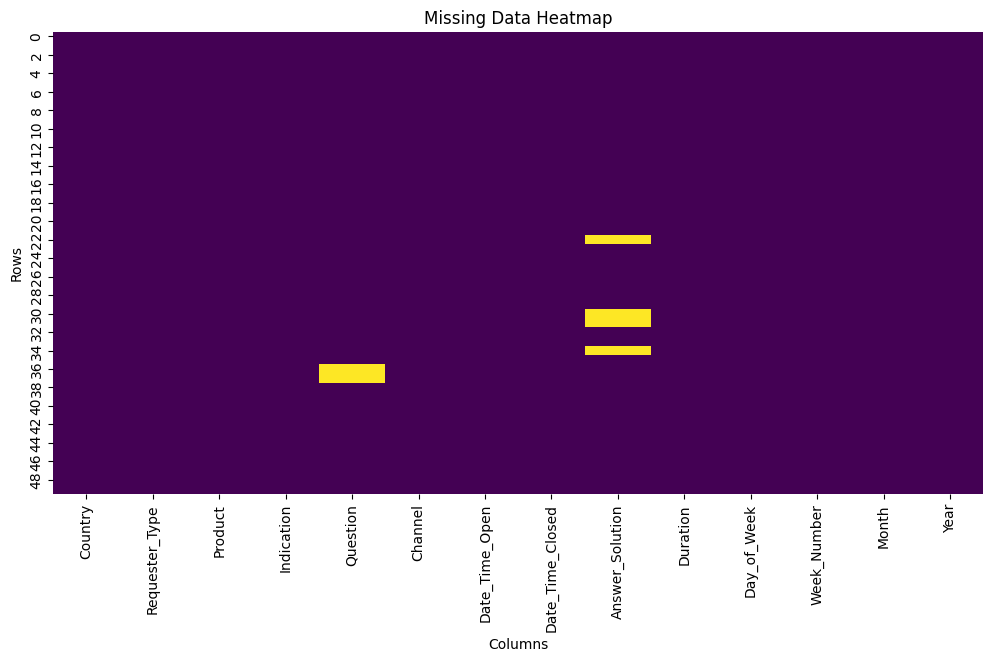

In [20]:
missing_data_analyzer = MissingDataAnalyzer(df)
missing_data_analyzer.analyze_missing_data()


In [23]:

print(df.shape)
df = df.dropna()
print(df.shape)

(44, 15)
(44, 15)


In [24]:
df["text"] = df.apply(lambda row: row["Question"] + " " + row["Answer_Solution"] ,axis = 1)

# embeddings and clustering

Getting embeddings and doing cluster analysis using HDBSCAN and plotting with T_SNE

In [25]:
# embedding_model = OpenAIEmbedding()
# embedding_model.get_embedding("Hola")


In [21]:
# Initialize the OpenAIEmbedding and EmbeddingProcessor
embedding_model = OpenAIEmbedding()
processor = EmbeddingProcessor(df, text_columns=["Question", "Answer_Solution", "text"], embedding_model=embedding_model)

# Generate embeddings
df_with_embeddings = processor.generate_embeddings()

# Show the DataFrame with the generated embeddings
df_with_embeddings.head()

/Users/juan/Documents/proyectos_propios/jobs/teamstation/EDA/src_eda/embedding_processor.py:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df[f"{column}_embedding"] = embeddings
/Users/juan/Documents/proyectos_propios/jobs/teamstation/EDA/src_eda/embedding_processor.py:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df[f"{column}_embedding"] = embeddings
/Users/juan/Documents/proyectos_propios/jobs/teamstation/EDA/src_eda/embedding_processor.py:72: SettingWithCopyWarning: 
A value is trying t

,Country,Requester_Type,Product,Indication,Question,Channel,Date_Time_Open,Date_Time_Closed,Answer_Solution,Duration,Day_of_Week,Week_Number,Month,Year,text,Question_embedding,Answer_Solution_embedding,text_embedding
0,UK,HCP,Keytruda,NSCLC,What are the common side effects of Keytruda?,email,2023-06-27 17:00:00,2023-07-21 18:00:00,"Common side effects include fatigue, nausea, a...",34620.0,Tuesday,26,June,2023,What are the common side effects of Keytruda? ...,"[-0.0016826390055939555, -0.024491919204592705...","[0.005529370158910751, -0.013466043397784233, ...","[0.00844237208366394, -0.0271916501224041, 0.0..."
1,US,Researcher,Keytruda,NSCLC,Can Keytruda cause immune-related adverse effe...,email,2023-06-08 08:00:00,2023-07-06 12:30:00,"Yes, Keytruda can cause immune-related adverse...",40590.0,Thursday,23,June,2023,Can Keytruda cause immune-related adverse effe...,"[-0.014400013722479343, -0.024656139314174652,...","[-0.01120684202760458, -0.01795337349176407, 0...","[-0.013065258041024208, -0.018199805170297623,..."
2,UK,HCP,Keytruda,NSCLC,Is Keytruda safe for pregnant women?,call,2023-03-06 04:00:00,2023-04-19 15:00:00,Keytruda is not recommended for use during pre...,64020.0,Monday,10,March,2023,Is Keytruda safe for pregnant women? Keytruda ...,"[-0.0033497007098048925, -0.025122756138443947...","[-0.004890821874141693, -0.03033408522605896, ...","[-0.01592901349067688, -0.03505585342645645, 0..."
3,UK,Researcher,Keytruda,NSCLC,What should patients report immediately while ...,email,2023-02-05 10:30:00,2023-03-05 06:00:00,Patients should report any new or worsening sy...,40050.0,Sunday,5,February,2023,What should patients report immediately while ...,"[-0.00839291699230671, -0.028981992974877357, ...","[-0.007508075330406427, -0.009821646846830845,...","[-0.017130352556705475, -0.0313427597284317, 0..."
4,US,Researcher,Keytruda,NSCLC,Are there any known interactions between Keytr...,call,2023-03-14 09:30:00,2023-04-16 18:30:00,"Yes, Keytruda can interact with steroids and c...",48060.0,Tuesday,11,March,2023,Are there any known interactions between Keytr...,"[-0.011224469169974327, -0.020188720896840096,...","[-0.00812547467648983, -0.034955818206071854, ...","[-0.009577972814440727, -0.031103724613785744,..."


In [24]:
min_cluster_size = 2
processor = DataProcessor(df)

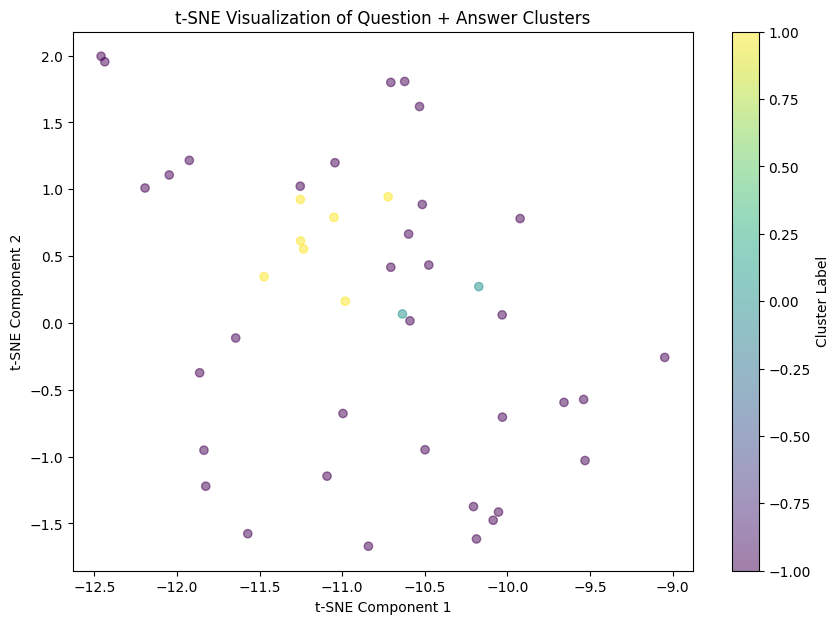

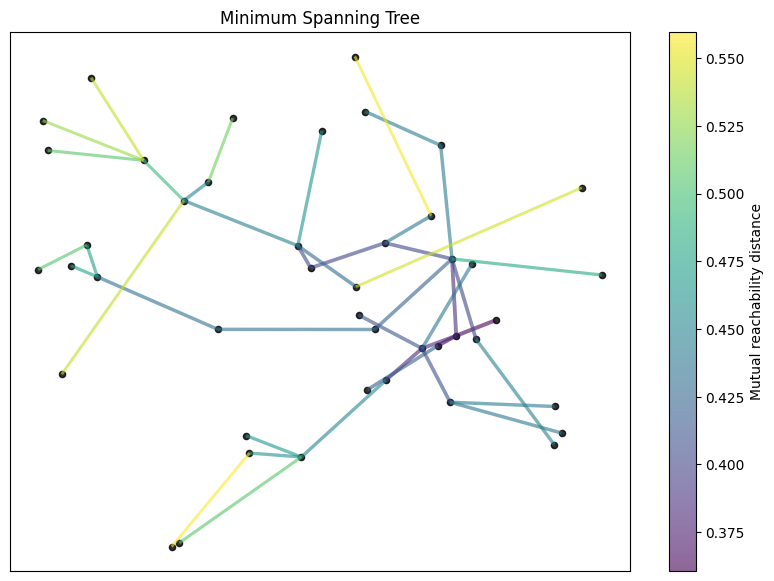

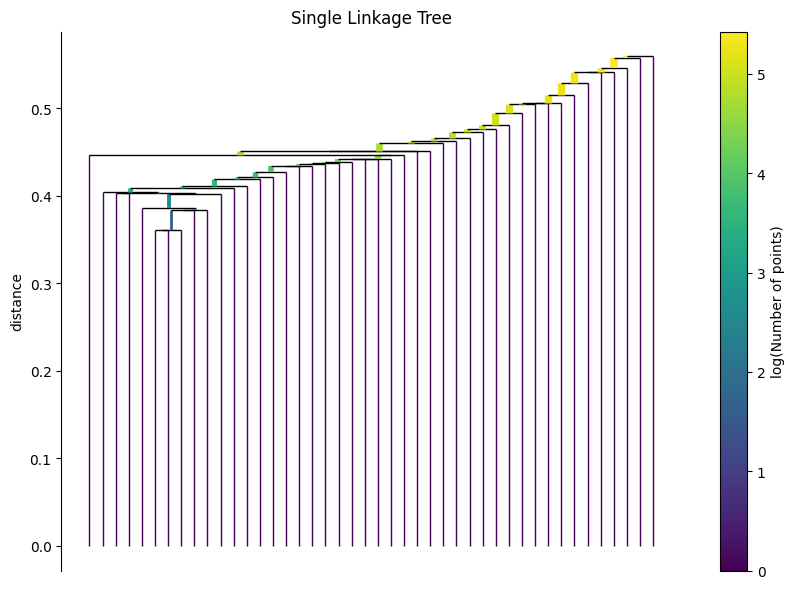

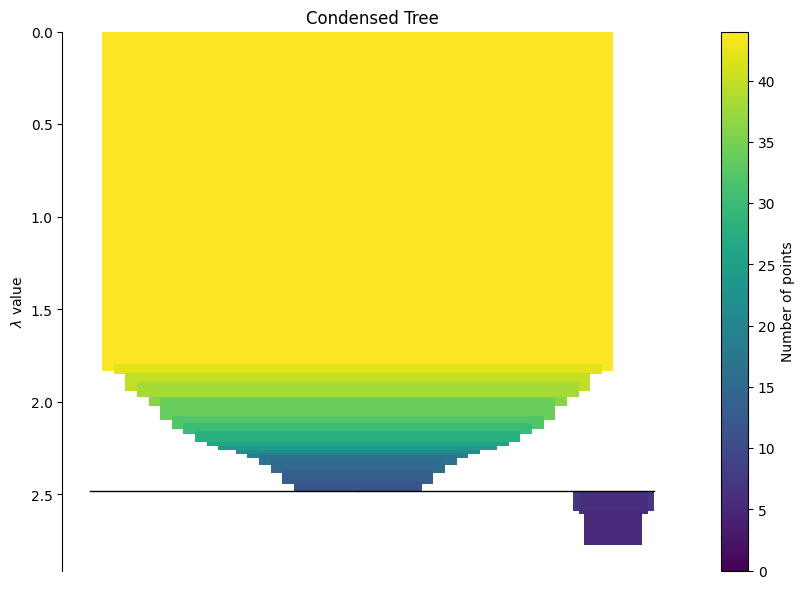

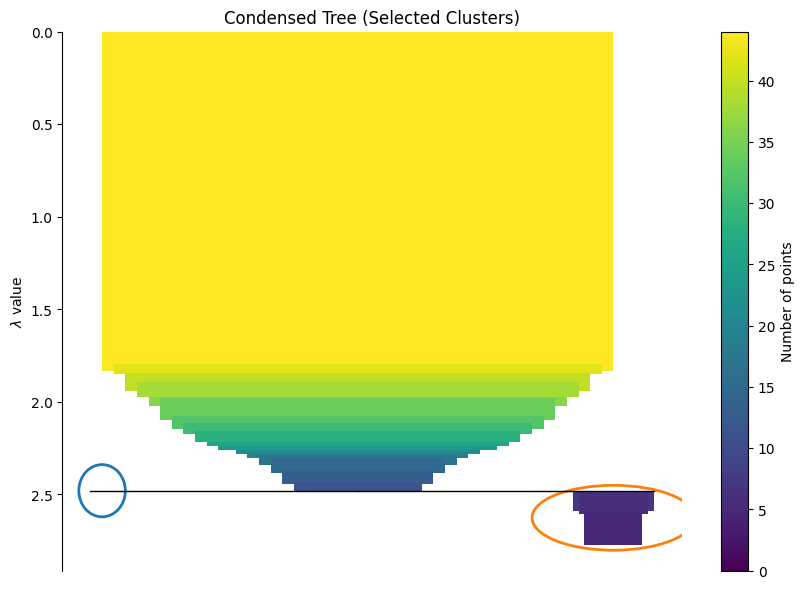

In [25]:


# Analyze Question Embeddings
question_embeddings = np.array(df['text_embedding'].tolist()) #processor.extract_question_embeddings()
question_clustering = ClusteringAnalysis(question_embeddings, min_cluster_size, processor.df, 'text_cluster')
question_labels = question_clustering.perform_clustering()
question_clustering.label_clusters()  # Label clusters in the DataFrame

question_visualizer = TSNEVisualizer(question_embeddings, question_labels, "t-SNE Visualization of Question + Answer Clusters")
question_visualizer.plot_clusters()

# Plot additional trees for question embeddings
question_visualizer.plot_minimum_spanning_tree(question_clustering.clusterer)
question_visualizer.plot_single_linkage_tree(question_clustering.clusterer)
question_visualizer.plot_condensed_tree(question_clustering.clusterer)
question_visualizer.plot_condensed_tree(question_clustering.clusterer, select_clusters=True)



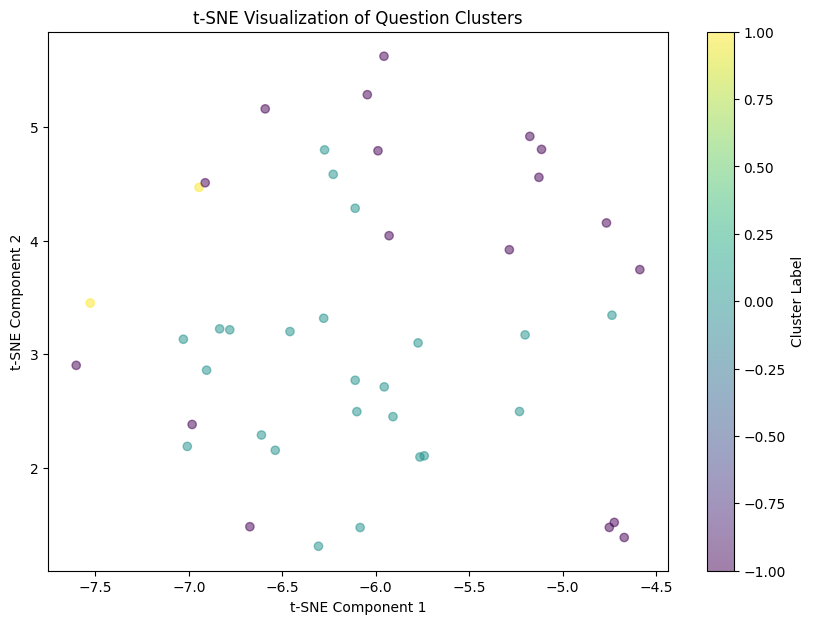

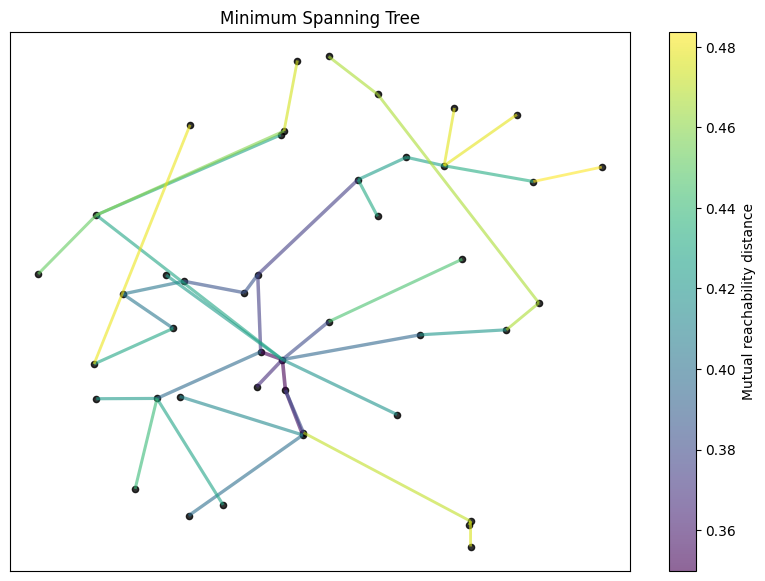

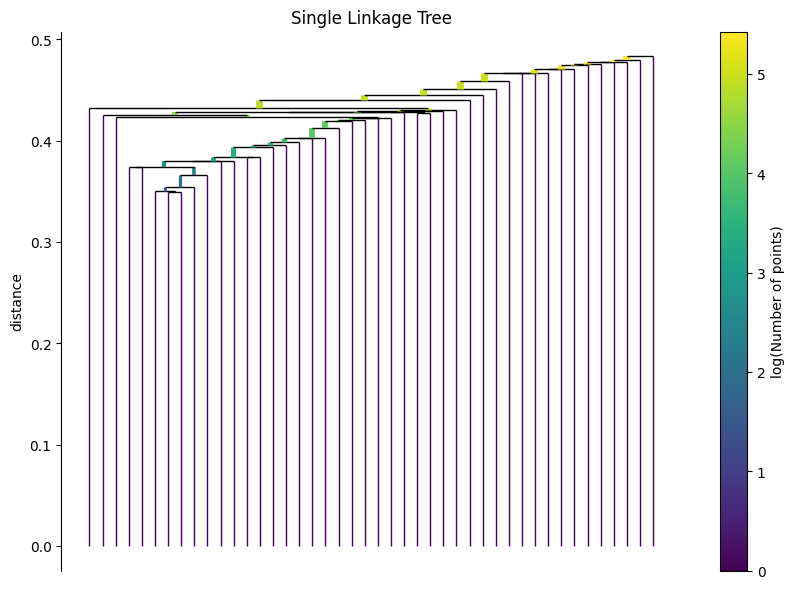

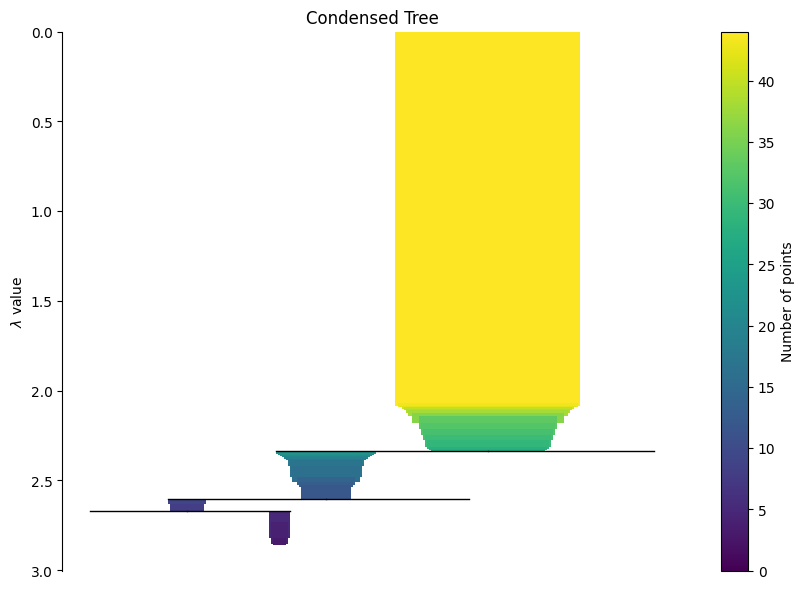

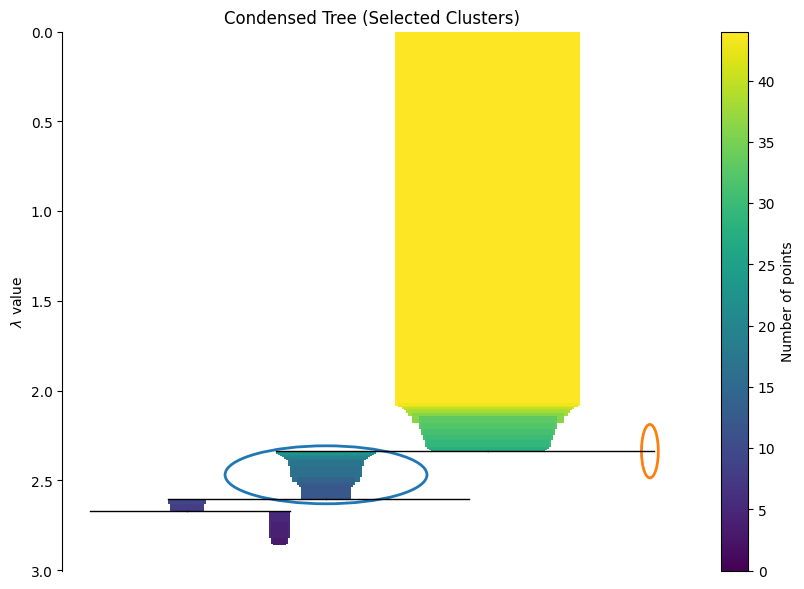

In [26]:

#min_cluster_size = 2
#processor = DataProcessor(df)

# Analyze Question Embeddings
question_embeddings = processor.extract_question_embeddings()
question_clustering = ClusteringAnalysis(question_embeddings, min_cluster_size, processor.df, 'question_cluster')
question_labels = question_clustering.perform_clustering()
question_clustering.label_clusters()  # Label clusters in the DataFrame

question_visualizer = TSNEVisualizer(question_embeddings, question_labels, "t-SNE Visualization of Question Clusters")
question_visualizer.plot_clusters()

# Plot additional trees for question embeddings
question_visualizer.plot_minimum_spanning_tree(question_clustering.clusterer)
question_visualizer.plot_single_linkage_tree(question_clustering.clusterer)
question_visualizer.plot_condensed_tree(question_clustering.clusterer)
question_visualizer.plot_condensed_tree(question_clustering.clusterer, select_clusters=True)



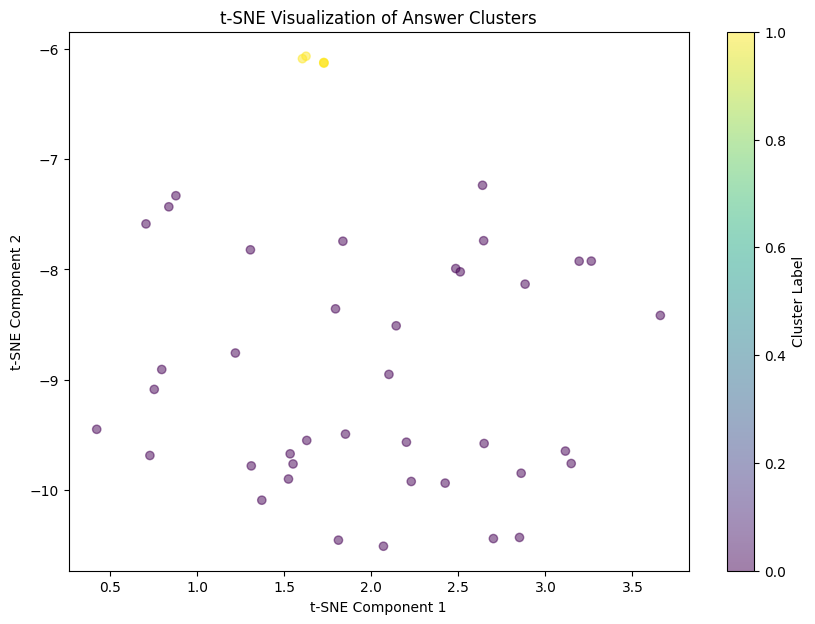

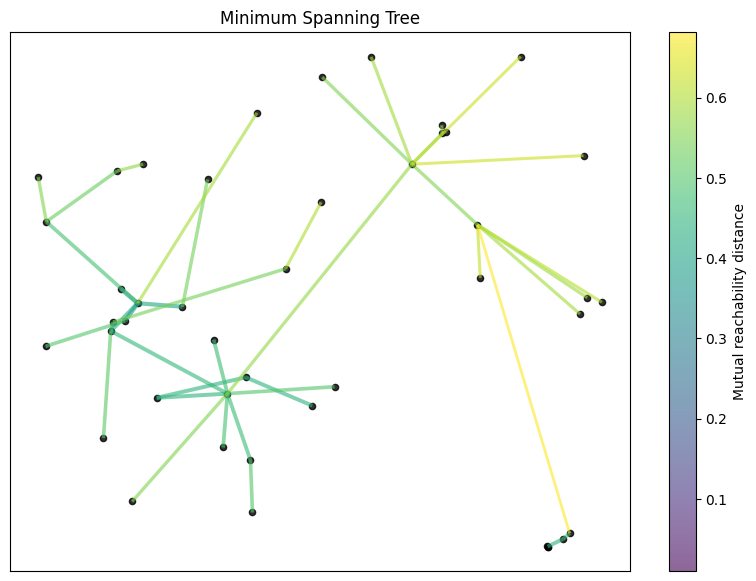

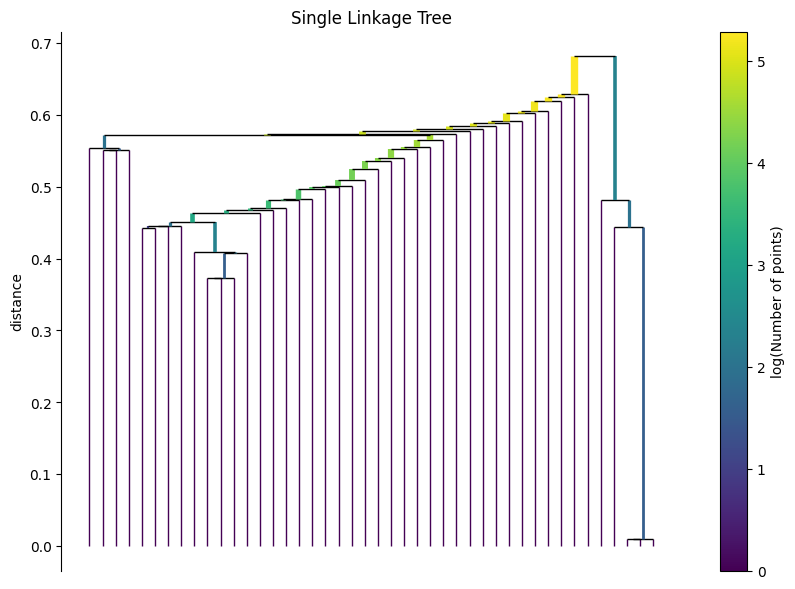

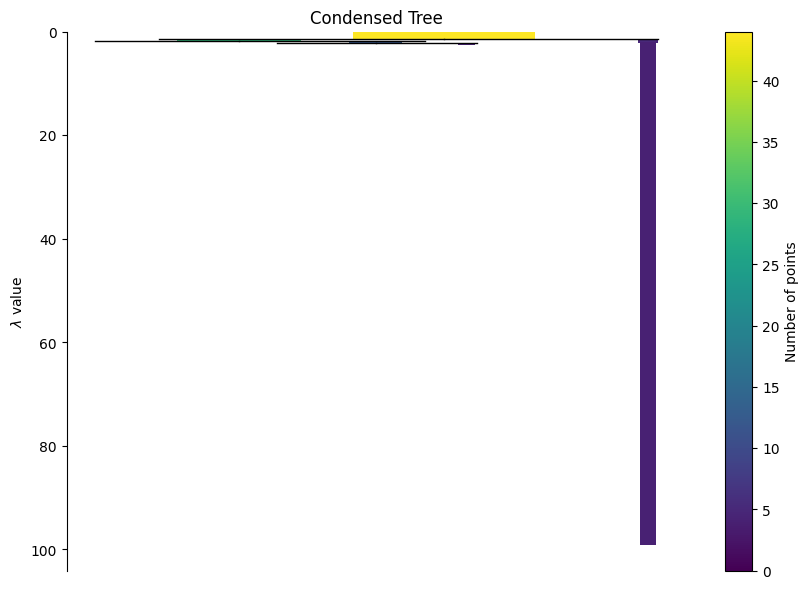

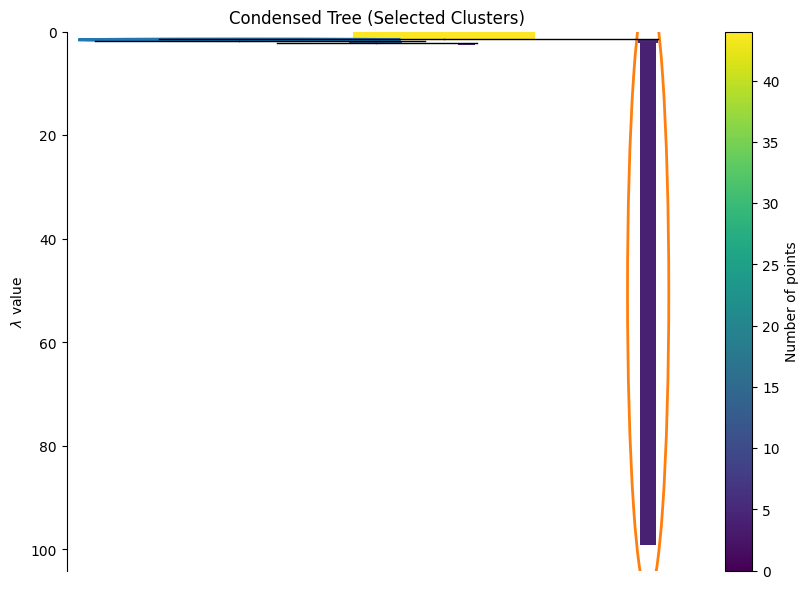

In [27]:
# Analyze Answer Embeddings
answer_embeddings = processor.extract_answer_embeddings()
answer_clustering = ClusteringAnalysis(answer_embeddings, min_cluster_size, processor.df, 'answer_cluster')
answer_labels = answer_clustering.perform_clustering()
answer_clustering.label_clusters()  # Label clusters in the DataFrame

answer_visualizer = TSNEVisualizer(answer_embeddings, answer_labels, "t-SNE Visualization of Answer Clusters")
answer_visualizer.plot_clusters()

# Plot additional trees for answer embeddings
answer_visualizer.plot_minimum_spanning_tree(answer_clustering.clusterer)
answer_visualizer.plot_single_linkage_tree(answer_clustering.clusterer)
answer_visualizer.plot_condensed_tree(answer_clustering.clusterer)
answer_visualizer.plot_condensed_tree(answer_clustering.clusterer, select_clusters=True)


In [28]:
df_cluster  = processor.df.copy()
df_cluster = df_cluster.dropna()
print(df_cluster.shape)
df_cluster.info()

(44, 21)
<class 'pandas.core.frame.DataFrame'>
Index: 44 entries, 0 to 49
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Country                    44 non-null     object        
 1   Requester_Type             44 non-null     object        
 2   Product                    44 non-null     object        
 3   Indication                 44 non-null     object        
 4   Question                   44 non-null     object        
 5   Channel                    44 non-null     object        
 6   Date_Time_Open             44 non-null     datetime64[ns]
 7   Date_Time_Closed           44 non-null     datetime64[ns]
 8   Answer_Solution            44 non-null     object        
 9   Duration                   44 non-null     float64       
 10  Day_of_Week                44 non-null     object        
 11  Week_Number                44 non-null     UInt32        
 12  Month 

In [29]:
#df_cluster = df_cluster.rename(columns = {"Answer_Solution":"Answer_Solution"})
df_cluster.to_excel("../data/processed_data/df_cluster.xlsx")
df_cluster.to_parquet("../data/processed_data/df_cluster.parquet")
df_cluster.drop(columns=['Question_embedding', "Answer_Solution_embedding", "text_embedding"], inplace=True)

print(df_cluster.shape)
df_cluster.head()



(44, 18)


,Country,Requester_Type,Product,Indication,Question,Channel,Date_Time_Open,Date_Time_Closed,Answer_Solution,Duration,Day_of_Week,Week_Number,Month,Year,text,text_cluster,question_cluster,answer_cluster
0,UK,HCP,Keytruda,NSCLC,What are the common side effects of Keytruda?,email,2023-06-27 17:00:00,2023-07-21 18:00:00,"Common side effects include fatigue, nausea, a...",34620.0,Tuesday,26,June,2023,What are the common side effects of Keytruda? ...,-1,-1,0
1,US,Researcher,Keytruda,NSCLC,Can Keytruda cause immune-related adverse effe...,email,2023-06-08 08:00:00,2023-07-06 12:30:00,"Yes, Keytruda can cause immune-related adverse...",40590.0,Thursday,23,June,2023,Can Keytruda cause immune-related adverse effe...,-1,0,0
2,UK,HCP,Keytruda,NSCLC,Is Keytruda safe for pregnant women?,call,2023-03-06 04:00:00,2023-04-19 15:00:00,Keytruda is not recommended for use during pre...,64020.0,Monday,10,March,2023,Is Keytruda safe for pregnant women? Keytruda ...,-1,-1,0
3,UK,Researcher,Keytruda,NSCLC,What should patients report immediately while ...,email,2023-02-05 10:30:00,2023-03-05 06:00:00,Patients should report any new or worsening sy...,40050.0,Sunday,5,February,2023,What should patients report immediately while ...,-1,-1,0
4,US,Researcher,Keytruda,NSCLC,Are there any known interactions between Keytr...,call,2023-03-14 09:30:00,2023-04-16 18:30:00,"Yes, Keytruda can interact with steroids and c...",48060.0,Tuesday,11,March,2023,Are there any known interactions between Keytr...,-1,0,0


In [30]:
# Create a SQLite in-memory database
conn = sqlite3.connect(':memory:')


# Load DataFrame into the SQLite database
#df_cluster[["question_cluster", "answer_cluster"]].to_sql('df_cluster', conn, index=False)
df_cluster.to_sql('df_cluster', conn, index=False)




44

In [31]:
query = """
SELECT 
        question_cluster,
        answer_cluster,
        text_cluster,
        COUNT(*) AS count
    FROM 
        df_cluster
    GROUP BY 
        text_cluster, question_cluster, answer_cluster
"""
ClusterCounts = pd.read_sql_query(query, conn)
ClusterCounts


,question_cluster,answer_cluster,text_cluster,count
0,-1,0,-1,16
1,-1,1,-1,2
2,0,0,-1,12
3,0,1,-1,3
4,1,0,-1,2
5,0,0,0,2
6,0,0,1,7


In [32]:
query = """
SELECT 
        text_cluster,
        COUNT(*) AS count
    FROM 
        df_cluster
    GROUP BY 
        text_cluster
"""
pd.read_sql_query(query, conn)



,text_cluster,count
0,-1,35
1,0,2
2,1,7


In [33]:
query = """
SELECT 
        question_cluster,
        COUNT(*) AS count
    FROM 
        df_cluster
    GROUP BY 
        question_cluster
"""
pd.read_sql_query(query, conn)



,question_cluster,count
0,-1,18
1,0,24
2,1,2


In [34]:
query = """
SELECT 
    Question,
    Answer_Solution
FROM 
    df_cluster 
where question_cluster = 0 and answer_cluster = 0
"""
case_0_0 = pd.read_sql_query(query, conn)
case_0_0


,Question,Answer_Solution
0,Can Keytruda cause immune-related adverse effe...,"Yes, Keytruda can cause immune-related adverse..."
1,Are there any known interactions between Keytr...,"Yes, Keytruda can interact with steroids and c..."
2,How effective is Keytruda in treating non-smal...,Keytruda has shown to improve survival rates s...
3,What is the response rate of melanoma patients...,Approximately 40% of melanoma patients respond...
4,Are there any specific monitoring protocols fo...,"Regular monitoring of liver function, lung fun..."
5,What was the impact of Keytruda on metastatic ...,Keytruda significantly reduced the progression...
6,How do the results of KEYNOTE-006 influence th...,The results encourage further research into im...
7,Can Keytruda be used in combination with other...,"Yes, Keytruda can be used in combination with ..."
8,How does Keytruda improve survival rates in NS...,Keytruda has been shown to improve the overall...
9,Are there specific side effects of Keytruda th...,"NSCLC patients should monitor for cough, short..."


In [35]:
df_cluster.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44 entries, 0 to 49
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Country           44 non-null     object        
 1   Requester_Type    44 non-null     object        
 2   Product           44 non-null     object        
 3   Indication        44 non-null     object        
 4   Question          44 non-null     object        
 5   Channel           44 non-null     object        
 6   Date_Time_Open    44 non-null     datetime64[ns]
 7   Date_Time_Closed  44 non-null     datetime64[ns]
 8   Answer_Solution   44 non-null     object        
 9   Duration          44 non-null     float64       
 10  Day_of_Week       44 non-null     object        
 11  Week_Number       44 non-null     UInt32        
 12  Month             44 non-null     object        
 13  Year              44 non-null     int32         
 14  text              44 non-null    

# Categorical variables Analysis

In [30]:
df_cluster = pd.read_parquet("../data/processed_data/df_cluster.parquet")
df_cluster.drop(columns=['Question_embedding', "Answer_Solution_embedding", "text_embedding"], inplace=True)
df_cluster["final_cluster"] = df_cluster.apply(lambda row: str(row["text_cluster"]) + str(row["question_cluster"]) + str(row["answer_cluster"]), axis = 1)
df_cluster

,Country,Requester_Type,Product,Indication,Question,Channel,Date_Time_Open,Date_Time_Closed,Answer_Solution,Duration,Day_of_Week,Week_Number,Month,Year,text,text_cluster,question_cluster,answer_cluster,final_cluster
0,UK,HCP,Keytruda,NSCLC,What are the common side effects of Keytruda?,email,2023-06-27 17:00:00,2023-07-21 18:00:00,"Common side effects include fatigue, nausea, a...",34620.0,Tuesday,26,June,2023,What are the common side effects of Keytruda? ...,-1,-1,0,-1-10
1,US,Researcher,Keytruda,NSCLC,Can Keytruda cause immune-related adverse effe...,email,2023-06-08 08:00:00,2023-07-06 12:30:00,"Yes, Keytruda can cause immune-related adverse...",40590.0,Thursday,23,June,2023,Can Keytruda cause immune-related adverse effe...,-1,0,0,-100
2,UK,HCP,Keytruda,NSCLC,Is Keytruda safe for pregnant women?,call,2023-03-06 04:00:00,2023-04-19 15:00:00,Keytruda is not recommended for use during pre...,64020.0,Monday,10,March,2023,Is Keytruda safe for pregnant women? Keytruda ...,-1,-1,0,-1-10
3,UK,Researcher,Keytruda,NSCLC,What should patients report immediately while ...,email,2023-02-05 10:30:00,2023-03-05 06:00:00,Patients should report any new or worsening sy...,40050.0,Sunday,5,February,2023,What should patients report immediately while ...,-1,-1,0,-1-10
4,US,Researcher,Keytruda,NSCLC,Are there any known interactions between Keytr...,call,2023-03-14 09:30:00,2023-04-16 18:30:00,"Yes, Keytruda can interact with steroids and c...",48060.0,Tuesday,11,March,2023,Are there any known interactions between Keytr...,-1,0,0,-100
5,US,Pharmacist,Keytruda,NSCLC,How effective is Keytruda in treating non-smal...,email,2023-06-09 11:00:00,2023-07-16 09:30:00,Keytruda has shown to improve survival rates s...,53190.0,Friday,23,June,2023,How effective is Keytruda in treating non-smal...,1,0,0,100
6,UK,Researcher,Keytruda,NSCLC,What is the response rate of melanoma patients...,email,2023-03-10 21:00:00,2023-04-03 05:00:00,Approximately 40% of melanoma patients respond...,33600.0,Friday,10,March,2023,What is the response rate of melanoma patients...,-1,0,0,-100
7,Canada,Pharmacist,Keytruda,NSCLC,Does Keytruda work for all types of cancer?,email,2023-05-17 06:00:00,2023-05-27 02:30:00,Keytruda is most effective in cancers that exp...,14190.0,Wednesday,20,May,2023,Does Keytruda work for all types of cancer? Ke...,-1,-1,0,-1-10
8,UK,HCP,Keytruda,NSCLC,How long does it take to see the effects of Ke...,call,2023-03-31 01:00:00,2023-04-17 08:30:00,Some patients may see effects as early as 2 to...,24930.0,Friday,13,March,2023,How long does it take to see the effects of Ke...,-1,-1,0,-1-10
9,UK,HCP,Keytruda,NSCLC,What is the five-year survival rate for patien...,call,2023-05-05 04:00:00,2023-06-01 17:30:00,No detailed information aviable on the given t...,39690.0,Friday,18,May,2023,What is the five-year survival rate for patien...,-1,0,1,-101


In [31]:
categorical_eda = CategoricalEDA(df_cluster)

print(categorical_eda.frequency_counts('Country'))
print(categorical_eda.frequency_counts('Requester_Type'))
print(categorical_eda.frequency_counts('Product'))
print(categorical_eda.frequency_counts('Indication'))
print(categorical_eda.frequency_counts('Channel'))
print(categorical_eda.frequency_counts('Day_of_Week'))
print(categorical_eda.frequency_counts('Week_Number'))
print(categorical_eda.frequency_counts('Month'))



Country
UK        17
US        14
Canada    13
Name: count, dtype: int64
Requester_Type
HCP           16
Pharmacist    16
Researcher    12
Name: count, dtype: int64
Product
Keytruda    44
Name: count, dtype: int64
Indication
NSCLC    44
Name: count, dtype: int64
Channel
call     25
email    19
Name: count, dtype: int64
Day_of_Week
Friday       11
Tuesday      10
Thursday      6
Sunday        6
Monday        5
Wednesday     3
Saturday      3
Name: count, dtype: int64
Week_Number
20    4
21    4
9     3
23    3
4     3
13    3
18    3
3     2
12    2
1     2
26    2
17    2
11    2
10    2
15    1
19    1
5     1
2     1
24    1
8     1
6     1
Name: count, dtype: Int64
Month
May         12
March       11
January      8
June         6
April        4
February     3
Name: count, dtype: int64


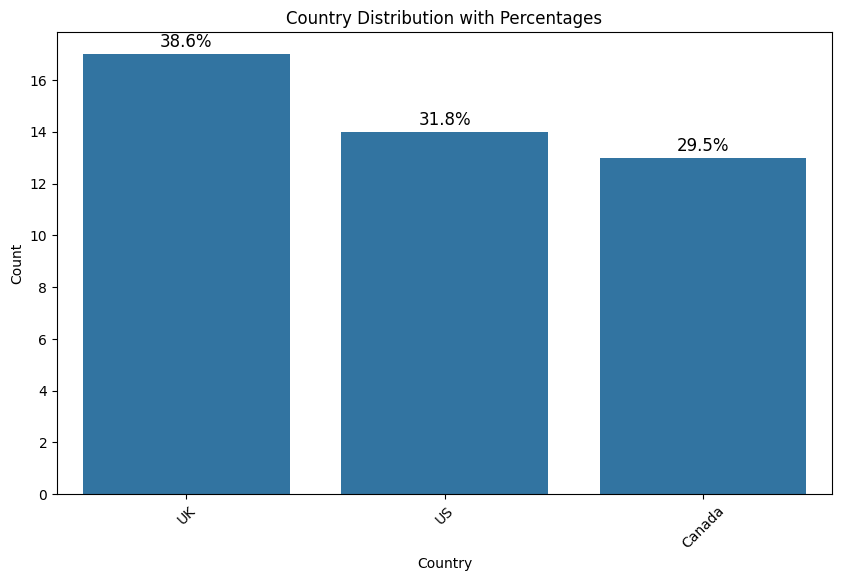

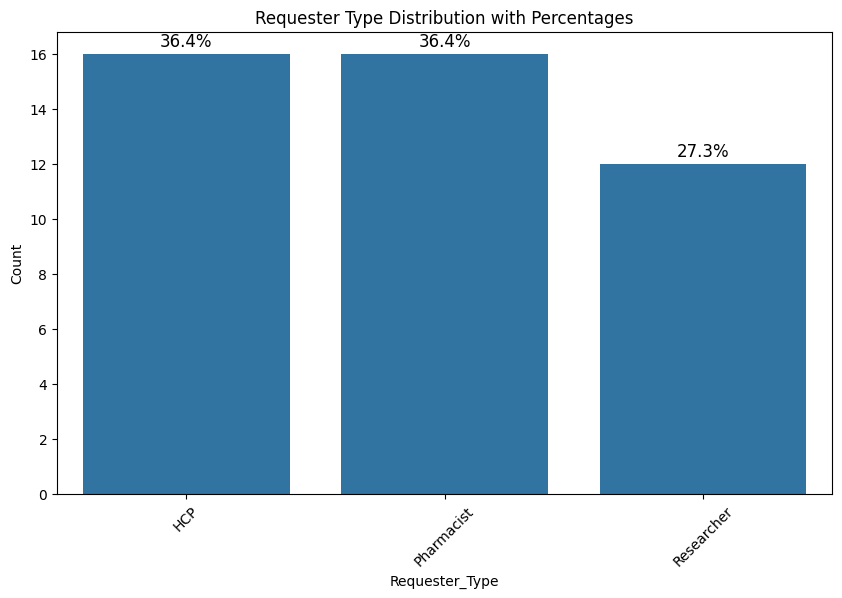

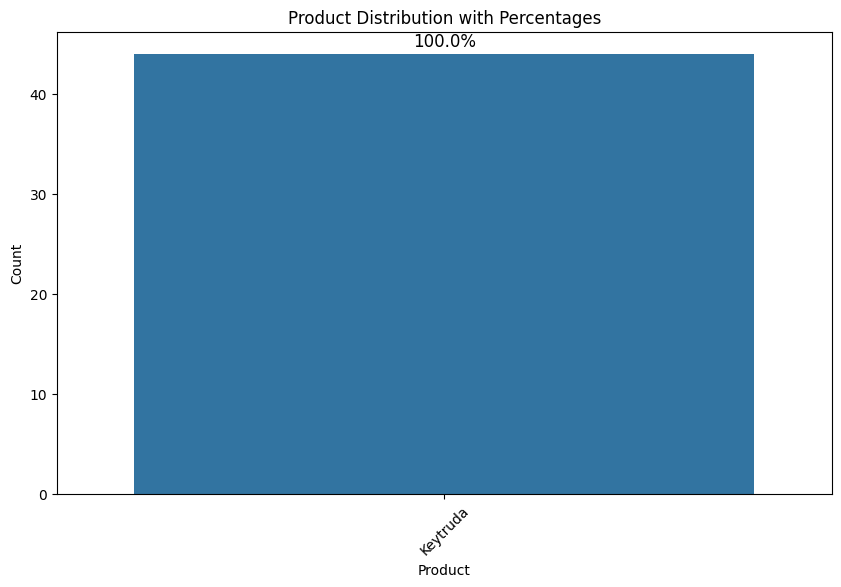

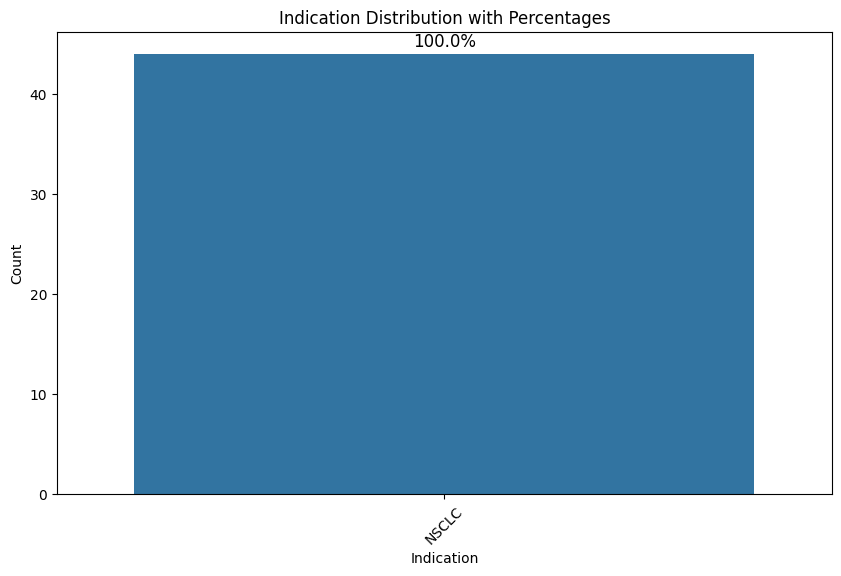

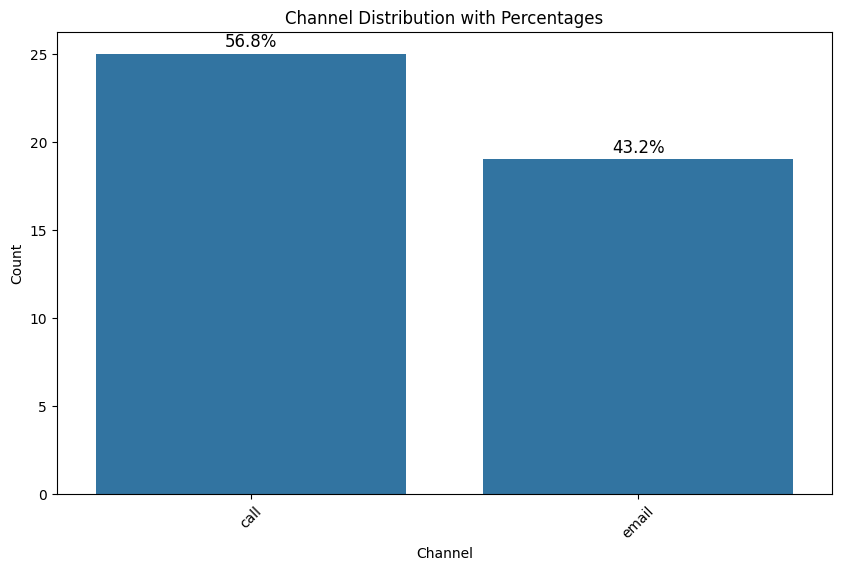

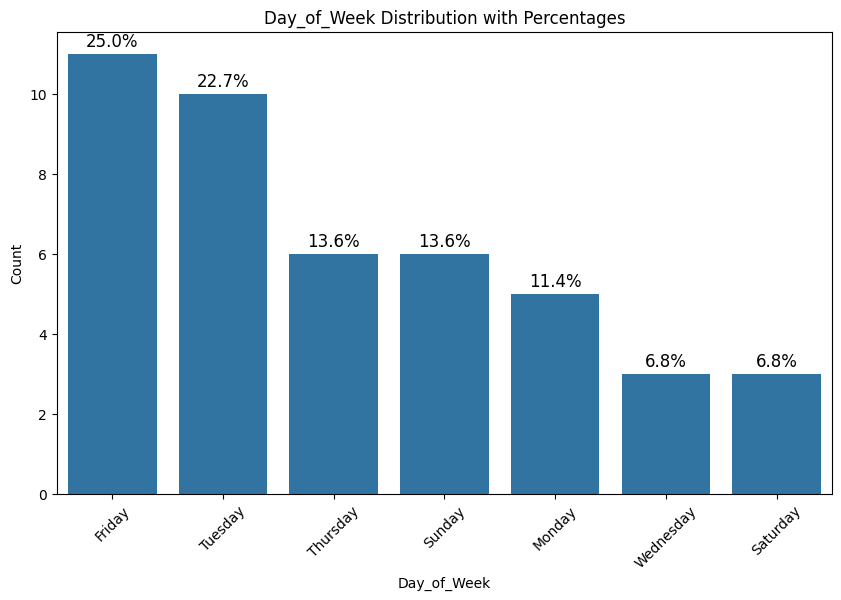

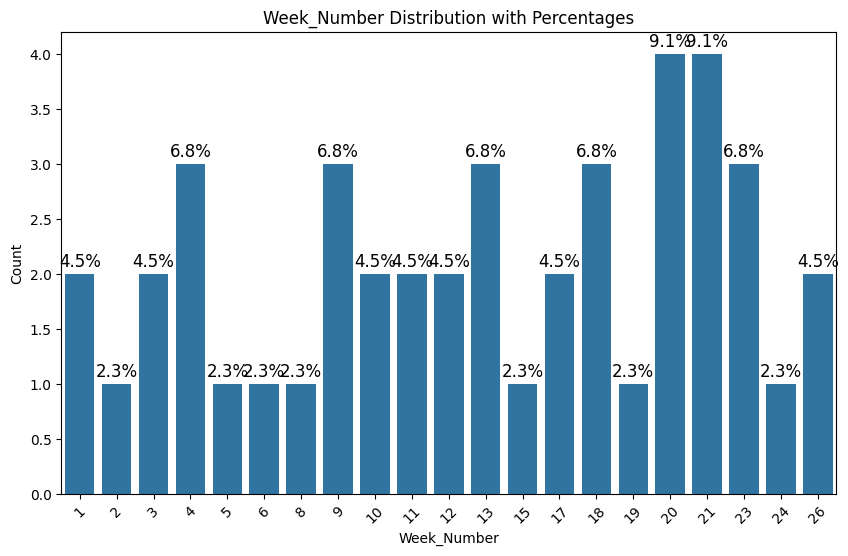

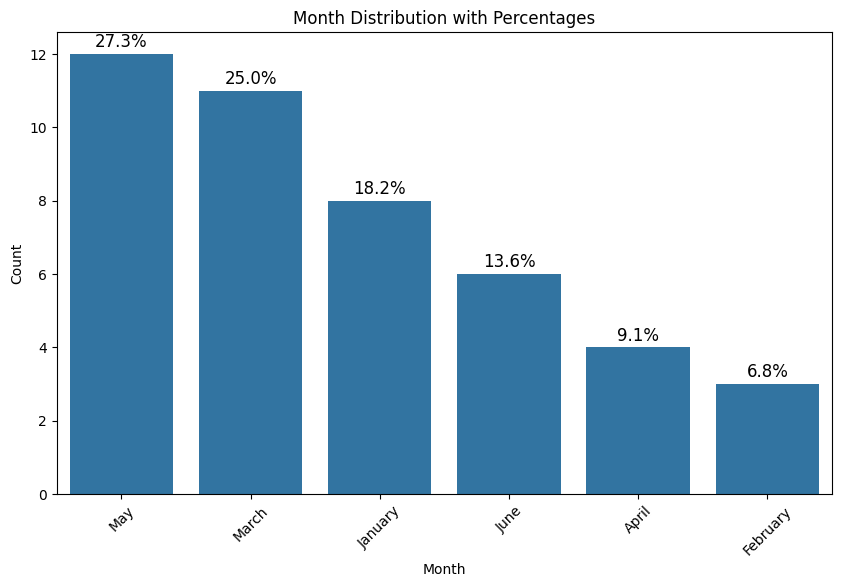

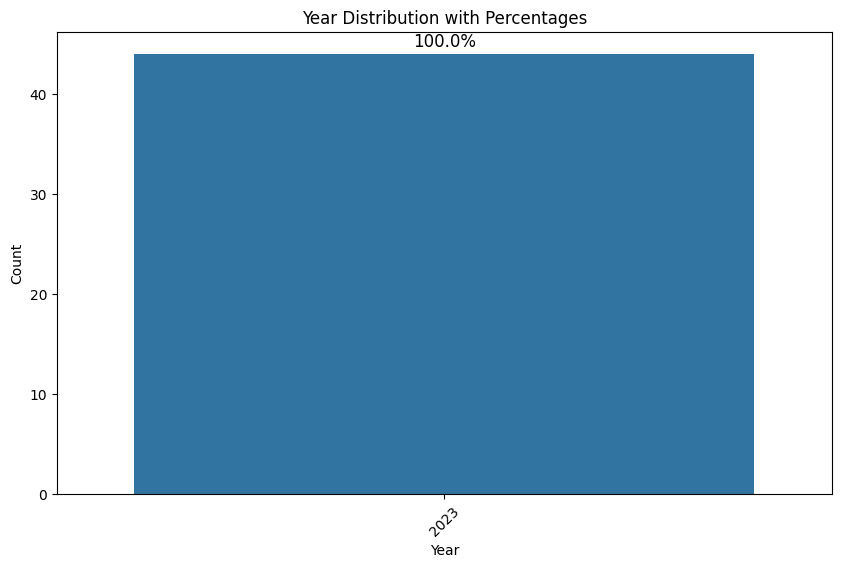

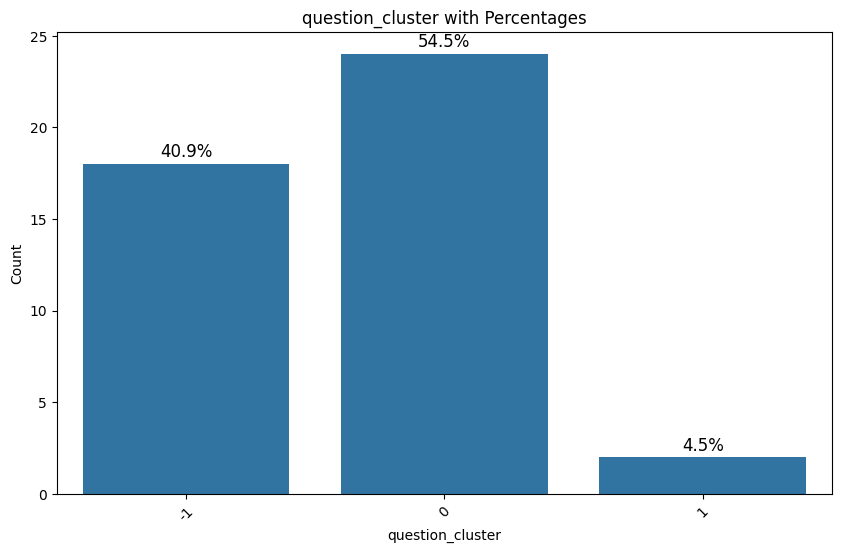

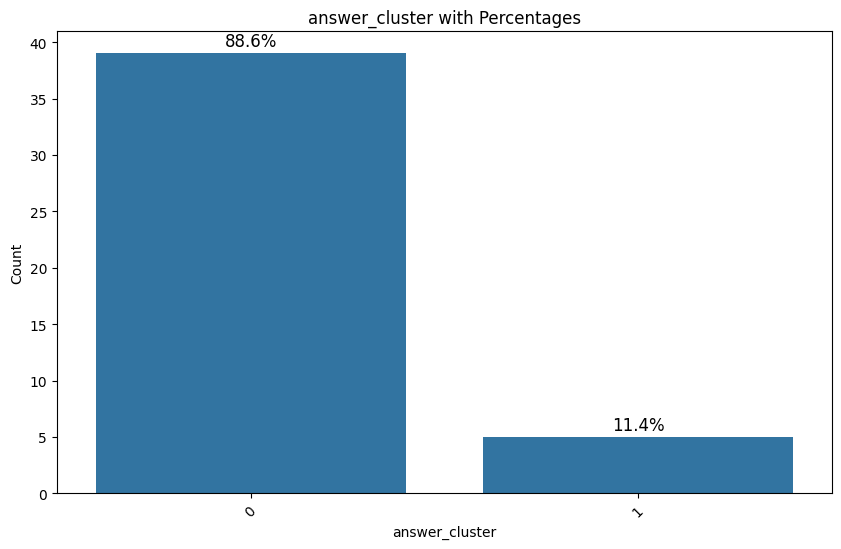

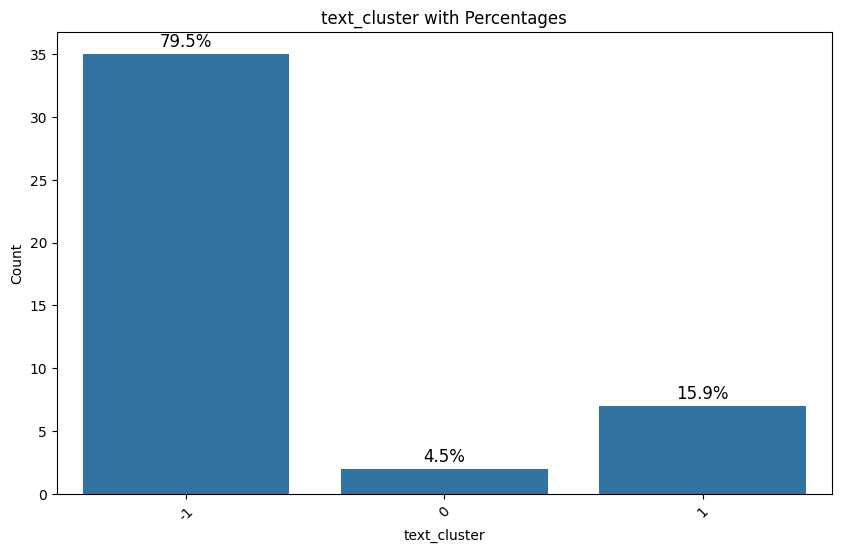

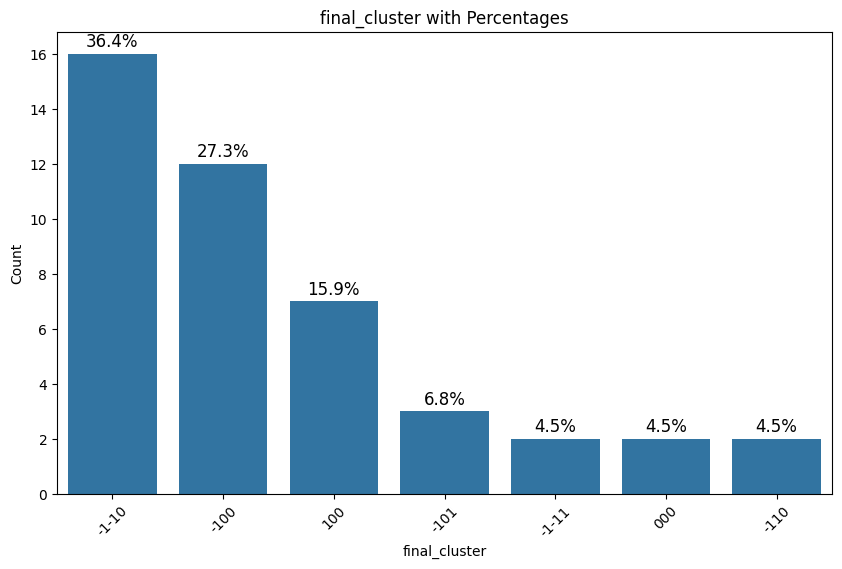

In [32]:
# 2. Bar Chart for each categorical variable
categorical_eda.plot_bar_chart('Country', title='Country Distribution with Percentages')
categorical_eda.plot_bar_chart('Requester_Type', title='Requester Type Distribution with Percentages')
categorical_eda.plot_bar_chart('Product', title='Product Distribution with Percentages')
categorical_eda.plot_bar_chart('Indication', title='Indication Distribution with Percentages')
categorical_eda.plot_bar_chart('Channel', title='Channel Distribution with Percentages')
categorical_eda.plot_bar_chart('Day_of_Week', title='Day_of_Week Distribution with Percentages')
categorical_eda.plot_bar_chart('Week_Number', title='Week_Number Distribution with Percentages')
categorical_eda.plot_bar_chart('Month', title='Month Distribution with Percentages')
categorical_eda.plot_bar_chart('Year', title='Year Distribution with Percentages')

categorical_eda.plot_bar_chart('question_cluster', title='question_cluster with Percentages')
categorical_eda.plot_bar_chart('answer_cluster', title='answer_cluster with Percentages')
categorical_eda.plot_bar_chart('text_cluster', title='text_cluster with Percentages')
categorical_eda.plot_bar_chart('final_cluster', title='final_cluster with Percentages')



In [33]:
# Define the list of categorical variables
categorical_vars = ['Country', 'Requester_Type', 'Product', 'Indication', 'Channel', 
                    'Day_of_Week', 'Week_Number', 'Month', 'Year',
                     "final_cluster"]

# Get all potential associations between the categorical variables
associations_df = categorical_eda.test_all_associations(categorical_vars)

# Display the associations
associations_df


,Variable 1,Variable 2,Chi2,p-value,Degrees of Freedom,is_independent
0,Country,Requester_Type,1.891995,7.556153e-01,4,True
1,Country,Product,0.000000,1.000000e+00,0,True
2,Country,Indication,0.000000,1.000000e+00,0,True
3,Country,Channel,3.358029,1.865577e-01,2,True
4,Country,Day_of_Week,11.660073,4.733511e-01,12,True
5,Country,Week_Number,43.747576,3.153866e-01,40,True
6,Country,Month,8.459438,5.840533e-01,10,True
7,Country,Year,0.000000,1.000000e+00,0,True
8,Country,final_cluster,8.756583,7.235688e-01,12,True
9,Requester_Type,Product,0.000000,1.000000e+00,0,True


In [40]:
df = pd.read_parquet("../data/processed_data/df_cluster.parquet")
print(df.shape)
df.info()

(44, 21)
<class 'pandas.core.frame.DataFrame'>
Index: 44 entries, 0 to 49
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Country                    44 non-null     object        
 1   Requester_Type             44 non-null     object        
 2   Product                    44 non-null     object        
 3   Indication                 44 non-null     object        
 4   Question                   44 non-null     object        
 5   Channel                    44 non-null     object        
 6   Date_Time_Open             44 non-null     datetime64[ns]
 7   Date_Time_Closed           44 non-null     datetime64[ns]
 8   Answer_Solution            44 non-null     object        
 9   Duration                   44 non-null     float64       
 10  Day_of_Week                44 non-null     object        
 11  Week_Number                44 non-null     UInt32        
 12  Month 

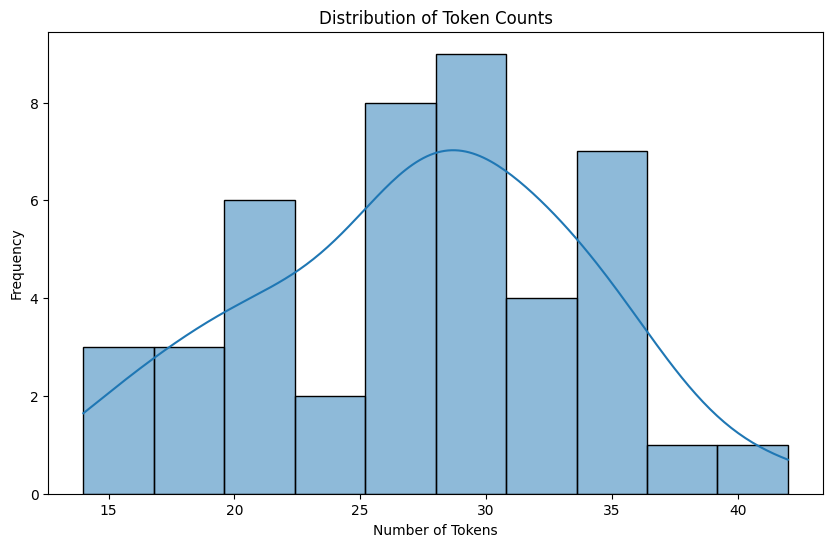

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df['token_count'] = df['text'].apply(lambda x: len(x.split()))

# Step 2: Plot the distribution of token counts using Seaborn
plt.figure(figsize=(10, 6))
sns.histplot(df['token_count'], bins=10, kde=True)
plt.title('Distribution of Token Counts')
plt.xlabel('Number of Tokens')
plt.ylabel('Frequency')
plt.show()

# concatenating embeddings with categorical variables

In [43]:
df = pd.read_parquet("../data/processed_data/df_cluster.parquet")
print(df.shape)
df.info()

(44, 21)
<class 'pandas.core.frame.DataFrame'>
Index: 44 entries, 0 to 49
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Country                    44 non-null     object        
 1   Requester_Type             44 non-null     object        
 2   Product                    44 non-null     object        
 3   Indication                 44 non-null     object        
 4   Question                   44 non-null     object        
 5   Channel                    44 non-null     object        
 6   Date_Time_Open             44 non-null     datetime64[ns]
 7   Date_Time_Closed           44 non-null     datetime64[ns]
 8   Answer_Solution            44 non-null     object        
 9   Duration                   44 non-null     float64       
 10  Day_of_Week                44 non-null     object        
 11  Week_Number                44 non-null     UInt32        
 12  Month 

In [44]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import pandas as pd

In [45]:
embeddings_columns = "Question_embedding"  # Example embedding column name
concatenated_embedding = embeddings_columns + "_concatenated"  # Name of the new concatenated column
columns_to_concat = ['Country', 'Requester_Type', 'Product', 'Indication',
                      'Channel', 'question_cluster']


# Create encoders and a scaler for numerical representation
encoders = {col: LabelEncoder() for col in columns_to_concat}
scaler = MinMaxScaler()

# Encode the categorical columns
encoded_columns = pd.DataFrame()
for col in columns_to_concat:
    encoded_columns[col] = encoders[col].fit_transform(df[col])

# Scale the encoded values to the range [0, 1]
scaled_values = scaler.fit_transform(encoded_columns)
scaled_values



array([[0.5, 0. , 0. , 0. , 1. , 0. ],
       [1. , 1. , 0. , 0. , 1. , 0.5],
       [0.5, 0. , 0. , 0. , 0. , 0. ],
       [0.5, 1. , 0. , 0. , 1. , 0. ],
       [1. , 1. , 0. , 0. , 0. , 0.5],
       [1. , 0.5, 0. , 0. , 1. , 0.5],
       [0.5, 1. , 0. , 0. , 1. , 0.5],
       [0. , 0.5, 0. , 0. , 1. , 0. ],
       [0.5, 0. , 0. , 0. , 0. , 0. ],
       [0.5, 0. , 0. , 0. , 0. , 0.5],
       [0.5, 0. , 0. , 0. , 0. , 0. ],
       [0.5, 0. , 0. , 0. , 0. , 0.5],
       [1. , 0.5, 0. , 0. , 1. , 0.5],
       [0.5, 0. , 0. , 0. , 1. , 0. ],
       [0. , 1. , 0. , 0. , 1. , 0. ],
       [1. , 1. , 0. , 0. , 0. , 0. ],
       [0. , 1. , 0. , 0. , 0. , 0.5],
       [0. , 0.5, 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0.5],
       [0. , 0. , 0. , 0. , 1. , 0. ],
       [1. , 0. , 0. , 0. , 1. , 1. ],
       [1. , 0.5, 0. , 0. , 0. , 0. ],
       [0. , 1. , 0. , 0. , 0. , 0. ],
       [1. , 0. , 0. , 0. , 0. , 0. ],
       [1. , 0.5, 0. , 0. , 1. , 0.5],
       [0. , 0.5, 0. , 0.

In [46]:
# Define a function to transform a specific row
def transform_row(row, encoders, scaler, columns_to_concat):
    # Encode the row using the fitted encoders
    encoded_row = []
    for col in columns_to_concat:
        encoded_value = encoders[col].transform([row[col]])[0]  # Encode as single value
        encoded_row.append(encoded_value)
    
    # Scale the encoded row values using the fitted scaler
    scaled_row = scaler.transform([encoded_row])  # Scale and keep the result as a list
    return scaled_row.flatten()  # Flatten to a 1D array



In [47]:
df[concatenated_embedding] = df.apply(
        lambda row: np.concatenate((row[embeddings_columns], transform_row(row, encoders, scaler, columns_to_concat) )) ,
        axis=1
    )
df

/Users/juan/Documents/proyectos_propios/jobs/teamstation/.venv/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/juan/Documents/proyectos_propios/jobs/teamstation/.venv/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/juan/Documents/proyectos_propios/jobs/teamstation/.venv/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/juan/Documents/proyectos_propios/jobs/teamstation/.venv/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/juan/Documents/proyectos_propios/jobs/teamstation/.venv/lib/python3.9/site-packages/sklea

,Country,Requester_Type,Product,Indication,Question,Channel,Date_Time_Open,Date_Time_Closed,Answer_Solution,Duration,...,Month,Year,text,Question_embedding,Answer_Solution_embedding,text_embedding,text_cluster,question_cluster,answer_cluster,Question_embedding_concatenated
0,UK,HCP,Keytruda,NSCLC,What are the common side effects of Keytruda?,email,2023-06-27 17:00:00,2023-07-21 18:00:00,"Common side effects include fatigue, nausea, a...",34620.0,...,June,2023,What are the common side effects of Keytruda? ...,"[-0.0016826390055939555, -0.024491919204592705...","[0.005529370158910751, -0.013466043397784233, ...","[0.00844237208366394, -0.0271916501224041, 0.0...",-1,-1,0,"[-0.0016826390055939555, -0.024491919204592705..."
1,US,Researcher,Keytruda,NSCLC,Can Keytruda cause immune-related adverse effe...,email,2023-06-08 08:00:00,2023-07-06 12:30:00,"Yes, Keytruda can cause immune-related adverse...",40590.0,...,June,2023,Can Keytruda cause immune-related adverse effe...,"[-0.014400013722479343, -0.024656139314174652,...","[-0.01120684202760458, -0.01795337349176407, 0...","[-0.013065258041024208, -0.018199805170297623,...",-1,0,0,"[-0.014400013722479343, -0.024656139314174652,..."
2,UK,HCP,Keytruda,NSCLC,Is Keytruda safe for pregnant women?,call,2023-03-06 04:00:00,2023-04-19 15:00:00,Keytruda is not recommended for use during pre...,64020.0,...,March,2023,Is Keytruda safe for pregnant women? Keytruda ...,"[-0.0033497007098048925, -0.025122756138443947...","[-0.004890821874141693, -0.03033408522605896, ...","[-0.01592901349067688, -0.03505585342645645, 0...",-1,-1,0,"[-0.0033497007098048925, -0.025122756138443947..."
3,UK,Researcher,Keytruda,NSCLC,What should patients report immediately while ...,email,2023-02-05 10:30:00,2023-03-05 06:00:00,Patients should report any new or worsening sy...,40050.0,...,February,2023,What should patients report immediately while ...,"[-0.00839291699230671, -0.028981992974877357, ...","[-0.007508075330406427, -0.009821646846830845,...","[-0.017130352556705475, -0.0313427597284317, 0...",-1,-1,0,"[-0.00839291699230671, -0.028981992974877357, ..."
4,US,Researcher,Keytruda,NSCLC,Are there any known interactions between Keytr...,call,2023-03-14 09:30:00,2023-04-16 18:30:00,"Yes, Keytruda can interact with steroids and c...",48060.0,...,March,2023,Are there any known interactions between Keytr...,"[-0.011224469169974327, -0.020188720896840096,...","[-0.00812547467648983, -0.034955818206071854, ...","[-0.009577972814440727, -0.031103724613785744,...",-1,0,0,"[-0.011224469169974327, -0.020188720896840096,..."
5,US,Pharmacist,Keytruda,NSCLC,How effective is Keytruda in treating non-smal...,email,2023-06-09 11:00:00,2023-07-16 09:30:00,Keytruda has shown to improve survival rates s...,53190.0,...,June,2023,How effective is Keytruda in treating non-smal...,"[-0.020555932074785233, 0.00595865910872817, 0...","[-0.011787042953073978, 0.005128835327923298, ...","[-0.01679554209113121, 0.011288398876786232, 0...",1,0,0,"[-0.020555932074785233, 0.00595865910872817, 0..."
6,UK,Researcher,Keytruda,NSCLC,What is the response rate of melanoma patients...,email,2023-03-10 21:00:00,2023-04-03 05:00:00,Approximately 40% of melanoma patients respond...,33600.0,...,March,2023,What is the response rate of melanoma patients...,"[-0.024374239146709442, -0.019547531381249428,...","[-0.010429377667605877, -0.01711159758269787, ...","[-0.014422070235013962, -0.023591887205839157,...",-1,0,0,"[-0.024374239146709442, -0.019547531381249428,..."
7,Canada,Pharmacist,Keytruda,NSCLC,Does Keytruda work for all types of cancer?,email,2023-05-17 06:00:00,2023-05-27 02:30:00,Keytruda is most effective in cancers that exp...,14190.0,...,May,2023,Does Keytruda work for all types of cancer? Ke...,"[-0.00397005258128047, -0.020045721903443336, ...","[-0.016960641369223595, -0.003398504573851824,...","[-0.01413759309798479, -0.005595609080046415, ...",-1,-1,0,"[-0.00397005258128047, -0.020045721903443336, ..."
8,UK,HCP,Keytruda,NSCLC,How long d

In [48]:
df.columns

Index(['Country', 'Requester_Type', 'Product', 'Indication', 'Question',
       'Channel', 'Date_Time_Open', 'Date_Time_Closed', 'Answer_Solution',
       'Duration', 'Day_of_Week', 'Week_Number', 'Month', 'Year', 'text',
       'Question_embedding', 'Answer_Solution_embedding', 'text_embedding',
       'text_cluster', 'question_cluster', 'answer_cluster',
       'Question_embedding_concatenated'],
      dtype='object')

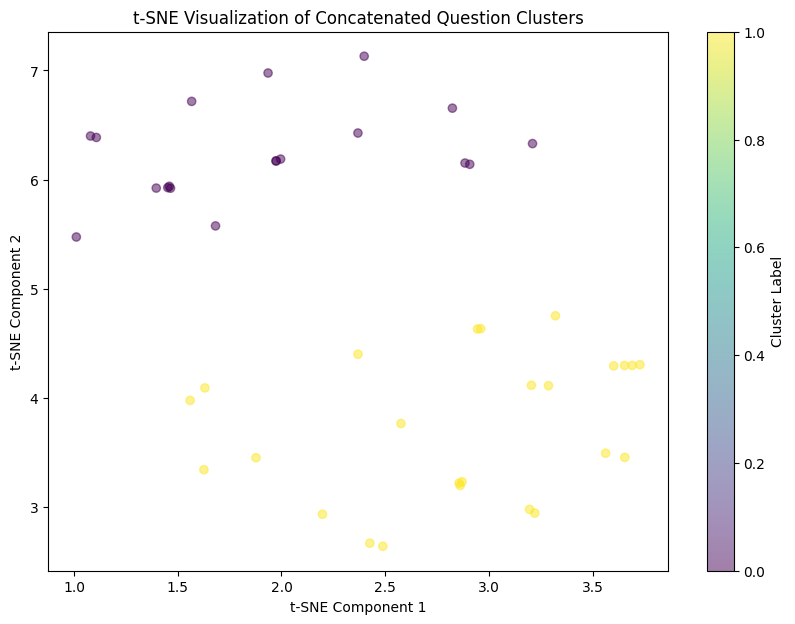

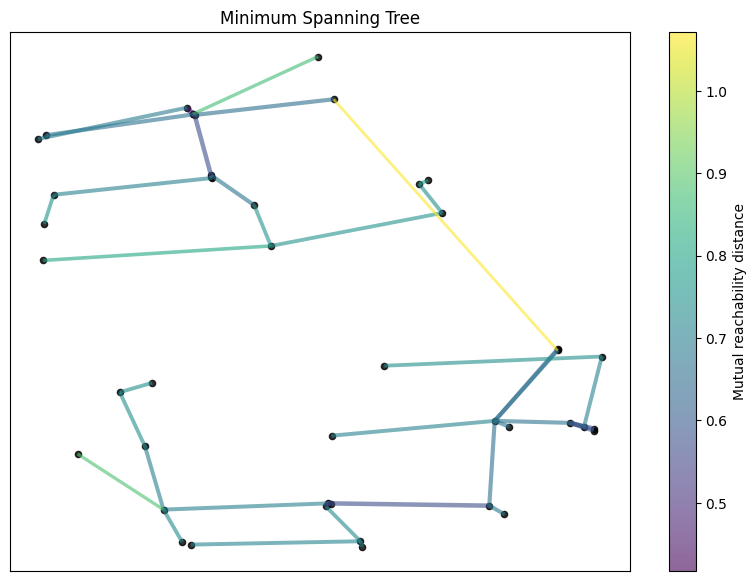

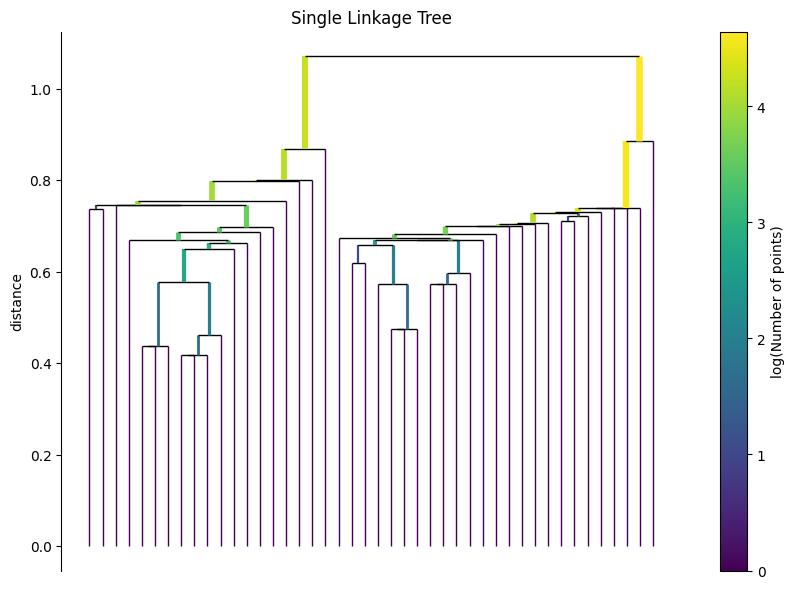

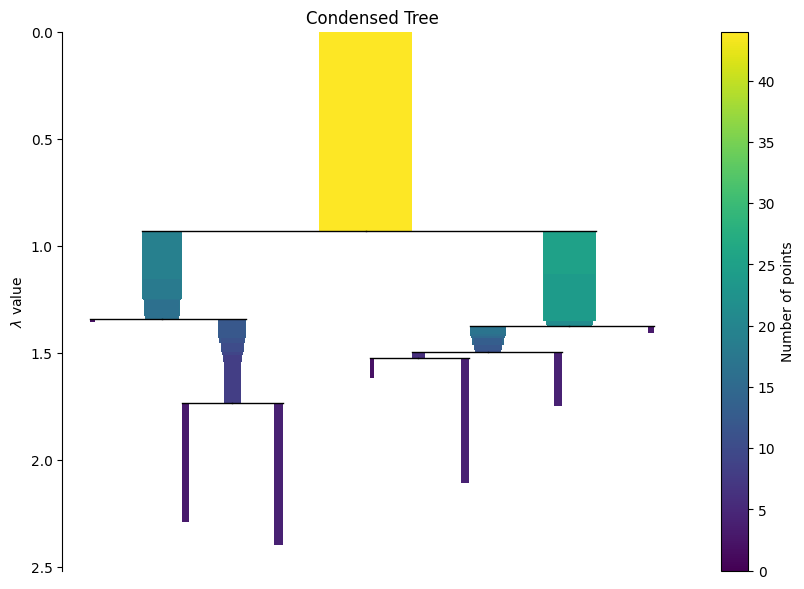

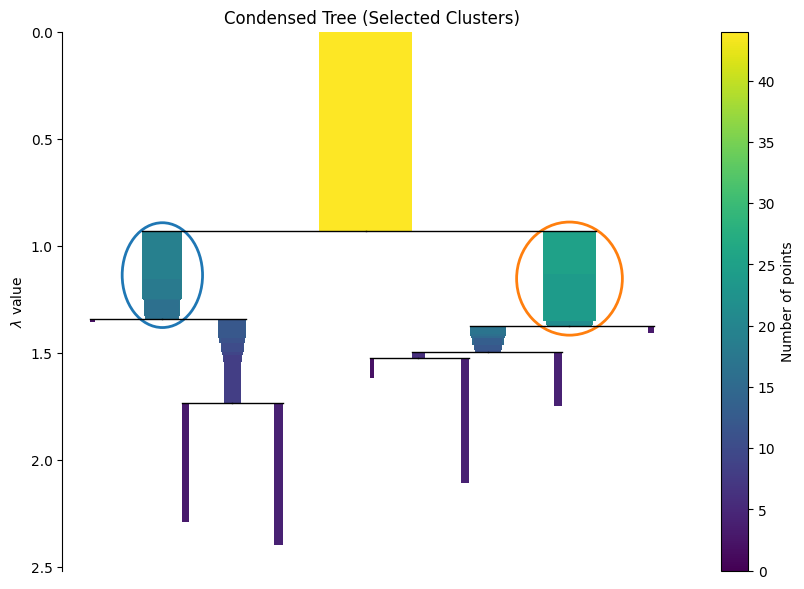

In [49]:

min_cluster_size = 2
processor = DataProcessor(df)

# Analyze Question Embeddings
#question_embeddings = processor.extract_question_embeddings()
question_embeddings = np.array(df['Question_embedding_concatenated'].tolist())
question_clustering = ClusteringAnalysis(question_embeddings, min_cluster_size, processor.df, 'question_cluster_concatenated')
question_labels = question_clustering.perform_clustering()
question_clustering.label_clusters()  # Label clusters in the DataFrame

question_visualizer = TSNEVisualizer(question_embeddings, question_labels, "t-SNE Visualization of Concatenated Question Clusters")
question_visualizer.plot_clusters()

# Plot additional trees for question embeddings
question_visualizer.plot_minimum_spanning_tree(question_clustering.clusterer)
question_visualizer.plot_single_linkage_tree(question_clustering.clusterer)
question_visualizer.plot_condensed_tree(question_clustering.clusterer)
question_visualizer.plot_condensed_tree(question_clustering.clusterer, select_clusters=True)



In [50]:
df

,Country,Requester_Type,Product,Indication,Question,Channel,Date_Time_Open,Date_Time_Closed,Answer_Solution,Duration,...,Month,Year,text,Question_embedding,Answer_Solution_embedding,text_embedding,text_cluster,question_cluster,answer_cluster,Question_embedding_concatenated
0,UK,HCP,Keytruda,NSCLC,What are the common side effects of Keytruda?,email,2023-06-27 17:00:00,2023-07-21 18:00:00,"Common side effects include fatigue, nausea, a...",34620.0,...,June,2023,What are the common side effects of Keytruda? ...,"[-0.0016826390055939555, -0.024491919204592705...","[0.005529370158910751, -0.013466043397784233, ...","[0.00844237208366394, -0.0271916501224041, 0.0...",-1,-1,0,"[-0.0016826390055939555, -0.024491919204592705..."
1,US,Researcher,Keytruda,NSCLC,Can Keytruda cause immune-related adverse effe...,email,2023-06-08 08:00:00,2023-07-06 12:30:00,"Yes, Keytruda can cause immune-related adverse...",40590.0,...,June,2023,Can Keytruda cause immune-related adverse effe...,"[-0.014400013722479343, -0.024656139314174652,...","[-0.01120684202760458, -0.01795337349176407, 0...","[-0.013065258041024208, -0.018199805170297623,...",-1,0,0,"[-0.014400013722479343, -0.024656139314174652,..."
2,UK,HCP,Keytruda,NSCLC,Is Keytruda safe for pregnant women?,call,2023-03-06 04:00:00,2023-04-19 15:00:00,Keytruda is not recommended for use during pre...,64020.0,...,March,2023,Is Keytruda safe for pregnant women? Keytruda ...,"[-0.0033497007098048925, -0.025122756138443947...","[-0.004890821874141693, -0.03033408522605896, ...","[-0.01592901349067688, -0.03505585342645645, 0...",-1,-1,0,"[-0.0033497007098048925, -0.025122756138443947..."
3,UK,Researcher,Keytruda,NSCLC,What should patients report immediately while ...,email,2023-02-05 10:30:00,2023-03-05 06:00:00,Patients should report any new or worsening sy...,40050.0,...,February,2023,What should patients report immediately while ...,"[-0.00839291699230671, -0.028981992974877357, ...","[-0.007508075330406427, -0.009821646846830845,...","[-0.017130352556705475, -0.0313427597284317, 0...",-1,-1,0,"[-0.00839291699230671, -0.028981992974877357, ..."
4,US,Researcher,Keytruda,NSCLC,Are there any known interactions between Keytr...,call,2023-03-14 09:30:00,2023-04-16 18:30:00,"Yes, Keytruda can interact with steroids and c...",48060.0,...,March,2023,Are there any known interactions between Keytr...,"[-0.011224469169974327, -0.020188720896840096,...","[-0.00812547467648983, -0.034955818206071854, ...","[-0.009577972814440727, -0.031103724613785744,...",-1,0,0,"[-0.011224469169974327, -0.020188720896840096,..."
5,US,Pharmacist,Keytruda,NSCLC,How effective is Keytruda in treating non-smal...,email,2023-06-09 11:00:00,2023-07-16 09:30:00,Keytruda has shown to improve survival rates s...,53190.0,...,June,2023,How effective is Keytruda in treating non-smal...,"[-0.020555932074785233, 0.00595865910872817, 0...","[-0.011787042953073978, 0.005128835327923298, ...","[-0.01679554209113121, 0.011288398876786232, 0...",1,0,0,"[-0.020555932074785233, 0.00595865910872817, 0..."
6,UK,Researcher,Keytruda,NSCLC,What is the response rate of melanoma patients...,email,2023-03-10 21:00:00,2023-04-03 05:00:00,Approximately 40% of melanoma patients respond...,33600.0,...,March,2023,What is the response rate of melanoma patients...,"[-0.024374239146709442, -0.019547531381249428,...","[-0.010429377667605877, -0.01711159758269787, ...","[-0.014422070235013962, -0.023591887205839157,...",-1,0,0,"[-0.024374239146709442, -0.019547531381249428,..."
7,Canada,Pharmacist,Keytruda,NSCLC,Does Keytruda work for all types of cancer?,email,2023-05-17 06:00:00,2023-05-27 02:30:00,Keytruda is most effective in cancers that exp...,14190.0,...,May,2023,Does Keytruda work for all types of cancer? Ke...,"[-0.00397005258128047, -0.020045721903443336, ...","[-0.016960641369223595, -0.003398504573851824,...","[-0.01413759309798479, -0.005595609080046415, ...",-1,-1,0,"[-0.00397005258128047, -0.020045721903443336, ..."
8,UK,HCP,Keytruda,NSCLC,How long d

In [51]:
df_cluster  = processor.df.copy()
df_cluster = df_cluster.dropna()
print(df_cluster.shape)
df_cluster.info()

(44, 23)
<class 'pandas.core.frame.DataFrame'>
Index: 44 entries, 0 to 49
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Country                          44 non-null     object        
 1   Requester_Type                   44 non-null     object        
 2   Product                          44 non-null     object        
 3   Indication                       44 non-null     object        
 4   Question                         44 non-null     object        
 5   Channel                          44 non-null     object        
 6   Date_Time_Open                   44 non-null     datetime64[ns]
 7   Date_Time_Closed                 44 non-null     datetime64[ns]
 8   Answer_Solution                  44 non-null     object        
 9   Duration                         44 non-null     float64       
 10  Day_of_Week                      44 non-null     object     

In [52]:
# Create a SQLite in-memory database
conn = sqlite3.connect(':memory:')


# Load DataFrame into the SQLite database
#df_cluster[["question_cluster", "answer_cluster"]].to_sql('df_cluster', conn, index=False)
df_cluster.to_sql('df_cluster', conn, index=False)




query = """
SELECT 
        question_cluster_concatenated,
        answer_cluster,
        COUNT(*) AS count
    FROM 
        df_cluster
    GROUP BY 
        question_cluster_concatenated, answer_cluster
"""
ClusterCounts = pd.read_sql_query(query, conn)
ClusterCounts


,question_cluster_concatenated,answer_cluster,count
0,0,0,17
1,0,1,2
2,1,0,22
3,1,1,3


In [53]:
df_cluster.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44 entries, 0 to 49
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Country                          44 non-null     object        
 1   Requester_Type                   44 non-null     object        
 2   Product                          44 non-null     object        
 3   Indication                       44 non-null     object        
 4   Question                         44 non-null     object        
 5   Channel                          44 non-null     object        
 6   Date_Time_Open                   44 non-null     datetime64[ns]
 7   Date_Time_Closed                 44 non-null     datetime64[ns]
 8   Answer_Solution                  44 non-null     object        
 9   Duration                         44 non-null     float64       
 10  Day_of_Week                      44 non-null     object        
 11  

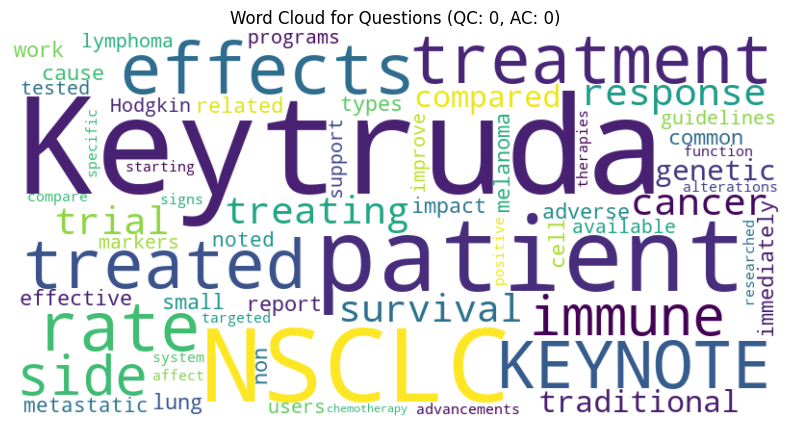

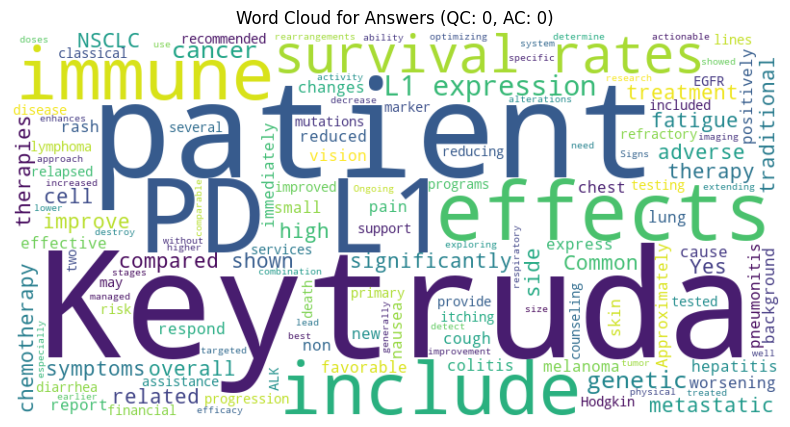

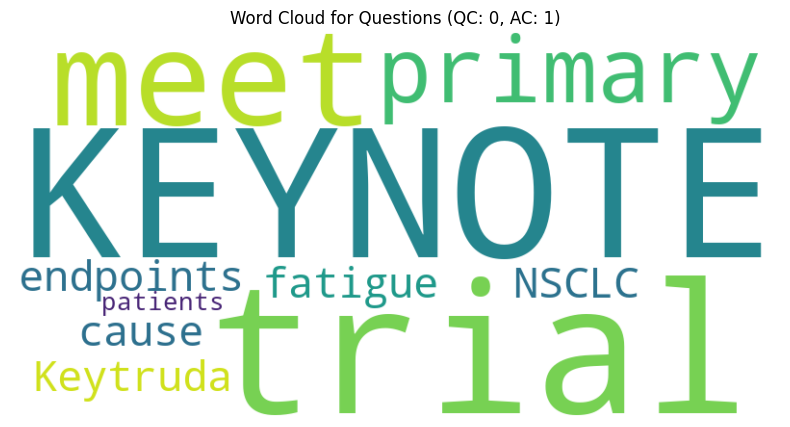

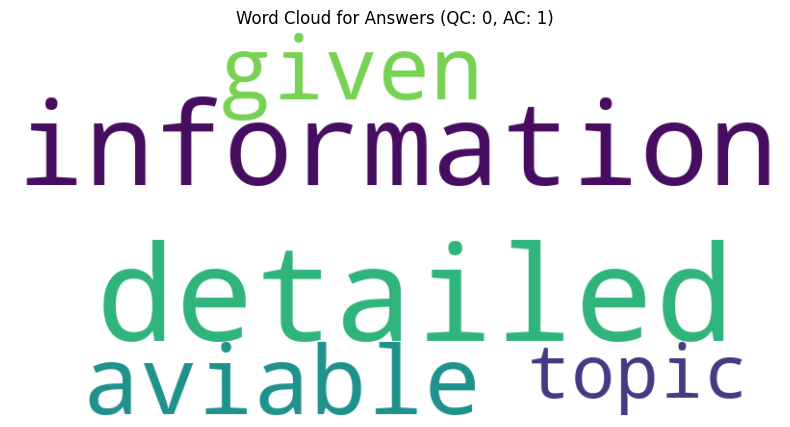

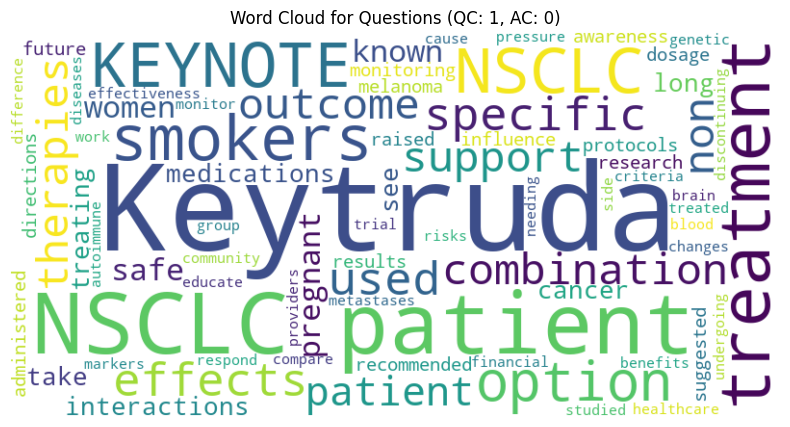

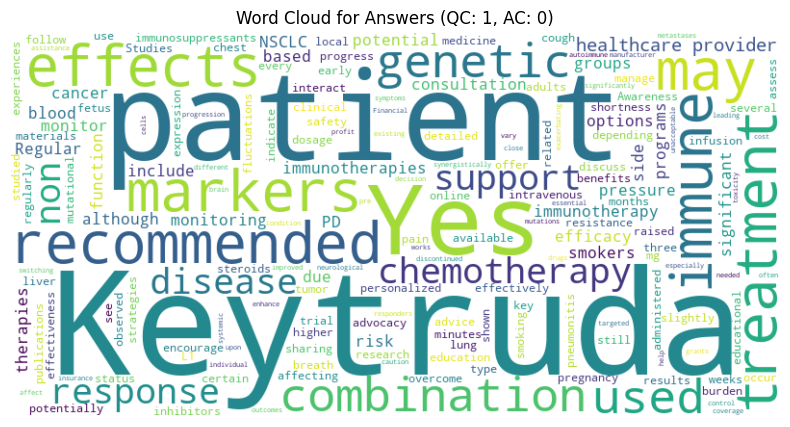

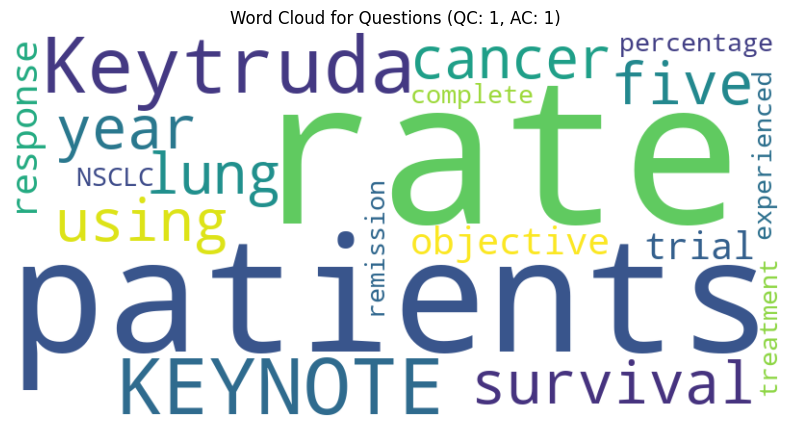

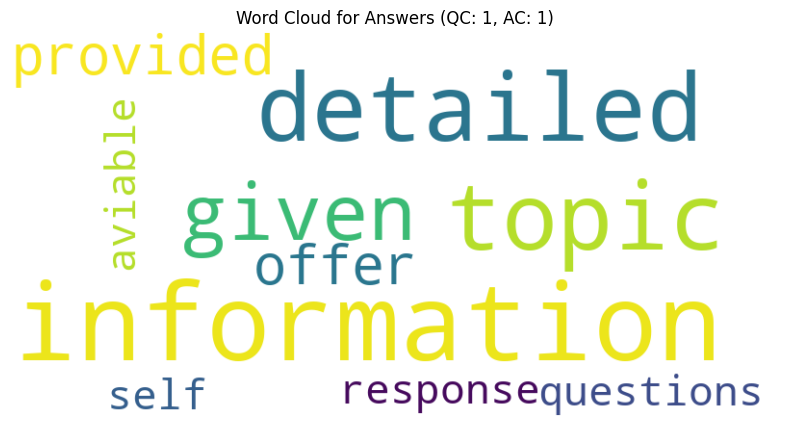

In [54]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# DataProcessor class handles data filtering based on cluster combinations
class DataProcessor:
    def __init__(self, df):
        self.df = df

    def filter_data(self, question_cluster, answer_cluster):
        """Filter the DataFrame based on the given cluster labels."""
        filtered_df = self.df[
            (self.df['question_cluster_concatenated'] == question_cluster) &
            (self.df['answer_cluster'] == answer_cluster)
        ]
        return filtered_df

# WordCloudGenerator class handles word cloud generation and display
class WordCloudGenerator:
    def __init__(self):
        pass

    def generate_word_cloud(self, text, title):
        """Generate and display a word cloud for the given text."""
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(title)
        plt.axis('off')
        plt.show()

# ClusterCombination class manages cluster combinations and processing
class ClusterCombination:
    def __init__(self, df):
        self.data_processor = DataProcessor(df)
        self.word_cloud_generator = WordCloudGenerator()
        self.combinations = [(0, 0), (0, 1), (1, 0), (1, 1)]

    def process_combinations(self):
        """Process each cluster combination and generate word clouds for each."""
        for question_cluster, answer_cluster in self.combinations:
            # Filter data
            filtered_df = self.data_processor.filter_data(question_cluster, answer_cluster)
            
            # Concatenate text from Question and Answer_Solution columns
            questions_text = " ".join(filtered_df['Question'])
            answers_text = " ".join(filtered_df['Answer_Solution'])
            
            # Generate word clouds
            self.word_cloud_generator.generate_word_cloud(
                questions_text, 
                f'Word Cloud for Questions (QC: {question_cluster}, AC: {answer_cluster})'
            )
            self.word_cloud_generator.generate_word_cloud(
                answers_text, 
                f'Word Cloud for Answers (QC: {question_cluster}, AC: {answer_cluster})'
            )

# Instantiate and run the cluster combination processor
#df = df_cluster  # Assuming df_cluster is your DataFrame
cluster_combination = ClusterCombination(df_cluster)
cluster_combination.process_combinations()
